# Reading and cleaning the data for one station (min, max, mean)

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

In [119]:
# Reading data from berlin Tempelhof setion

df_tem_mean = pd.read_table("./data/predefined/mean/ECA_homblend_tg/TG_STAID002759.txt")
df_tem_min = pd.read_table("./data/predefined/min/ECA_homblend_tn/TN_STAID002759.txt")
df_tem_max = pd.read_table("./data/predefined/max/ECA_homblend_tx/TX_STAID002759.txt")
df_tem_mean.head(20)

EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 08-04-2019
0   THESE DATA CAN BE USED FOR NON-COMMERCIAL RESE...                        
1   Squintu, AA, G. van der Schrier, Y. Brugnara a...                        
2   Int. J. of Climatol., 39, 1243-1261. doi:10.10...                        
3   Data and metadata available at http://www.ecad.eu                        
4           FILE FORMAT (MISSING VALUE CODE = -9999):                        
5                     01-06 STAID: Station identifier                        
6                      08-13 SOUID: Source identifier                        
7                          15-22 DATE : Date YYYYMMDD                        
8        24-28 TG   : Mean temperature in 0.1 &#176;C                        
9   30-34 Q_TG : quality code for TG (0='valid'; 1...                        
10  This is the homogenized and blended series of ...                        
11  Blended and updated with sources:11448 27488 9...                        
12  See files sources.txt and stations.txt for mor...                        
13                  STAID, SOUID,    DATE,   TG, Q_TG                        
14                   2759, 27488,18760101,   11,   -9                        
15                   2759, 27488,18760102,   14,   -9                        
16                   2759, 27488,18760103,  -10,   -9                        
17                   2759, 27488,18760104,  -78,   -9                        
18                   2759, 27488,18760105, -114,   -9                        
19                   2759, 27488,18760106,  -93,   -9

In [120]:
def clean_df_tg(df):
    """ This function gets a text file including 13 lines od explanation and then a comma separated table for 
    the mean values.
    It will first remove the explanation and then creates a data frame from the table and returns it.
    """
    df.drop(index=df.index[:14],inplace=True)
    rev = df["EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 08-04-2019"].apply(lambda x: pd.Series([i for i in reversed(x.split(','))]))
    rev.rename(columns={4:"STAID",3:"SOUID",2:"DATE", 1:"TG", 0:"Q_TG"},inplace=True)
    rev = rev[["STAID", "SOUID", "DATE", "TG", "Q_TG"]]
    rev.reset_index(drop=True, inplace=True)
    rev["DATE"] = pd.to_datetime(rev["DATE"], format="%Y%m%d")
    rev = rev.astype({"Q_TG": int, "TG": int, "SOUID": int, "STAID": int}, errors='raise')
    return rev

def clean_df_tn(df):
    """ This function gets a text file including 13 lines od explanation and then a comma separated table for 
    the min values.
    It will first remove the explanation and then creates a data frame from the table and returns it.
    """
    df.drop(index=df.index[:14],inplace=True)
    rev = df["EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 08-04-2019"].apply(lambda x: pd.Series([i for i in reversed(x.split(','))]))
    rev.rename(columns={4:"STAID",3:"SOUID",2:"DATE", 1:"TN", 0:"Q_TN"},inplace=True)
    rev = rev[["STAID", "SOUID", "DATE", "TN", "Q_TN"]]
    rev.reset_index(drop=True, inplace=True)
    rev["DATE"] = pd.to_datetime(rev["DATE"], format="%Y%m%d")
    rev = rev.astype({"Q_TN": int, "TN": int, "SOUID": int, "STAID": int}, errors='raise') 
    return rev


def clean_df_tx(df):
    """ This function gets a text file including 13 lines od explanation and then a comma separated table for 
    the max values.
    It will first remove the explanation and then creates a data frame from the table and returns it.
    """
    df.drop(index=df.index[:14],inplace=True)
    rev = df["EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 08-04-2019"].apply(lambda x: pd.Series([i for i in reversed(x.split(','))]))
    rev.rename(columns={4:"STAID",3:"SOUID",2:"DATE", 1:"TX", 0:"Q_TX"},inplace=True)
    rev = rev[["STAID", "SOUID", "DATE", "TX", "Q_TX"]]
    rev.reset_index(drop=True, inplace=True)
    rev["DATE"] = pd.to_datetime(rev["DATE"], format="%Y%m%d")
    rev = rev.astype({"Q_TX": int, "TX": int, "SOUID": int, "STAID": int}, errors='raise') 
    return rev

In [121]:
df_tem_mean = clean_df_tg(df_tem_mean)
df_tem_mean.head()

STAID  SOUID       DATE   TG  Q_TG
0   2759  27488 1876-01-01   11    -9
1   2759  27488 1876-01-02   14    -9
2   2759  27488 1876-01-03  -10    -9
3   2759  27488 1876-01-04  -78    -9
4   2759  27488 1876-01-05 -114    -9

In [122]:
df_tem_min = clean_df_tn(df_tem_min)
df_tem_min.head()

STAID  SOUID       DATE  TN  Q_TN
0   2759  27801 1936-01-01  13    -9
1   2759  27801 1936-01-02  -8    -9
2   2759  27801 1936-01-03  14    -9
3   2759  27801 1936-01-04  28    -9
4   2759  27801 1936-01-05   1    -9

In [123]:
df_tem_max = clean_df_tx(df_tem_max)
df_tem_max.head()

STAID  SOUID       DATE  TX  Q_TX
0   2759  11450 1950-01-01 -15    -9
1   2759  11450 1950-01-02  16    -9
2   2759  11450 1950-01-03  43    -9
3   2759  11450 1950-01-04  29    -9
4   2759  11450 1950-01-05  -4    -9

## checking for missing values (missing values code = -9999)

In [124]:
# mean values dataframe
df_tem_mean[df_tem_mean.eq(-9999).any(1)]

Empty DataFrame
Columns: [STAID, SOUID, DATE, TG, Q_TG]
Index: []

In [125]:
# min values dataframe
df_tem_min[df_tem_min.eq(-9999).any(1)]

Empty DataFrame
Columns: [STAID, SOUID, DATE, TN, Q_TN]
Index: []

In [126]:
# max values dataframe
df_tem_max[df_tem_max.eq(-9999).any(1)]

Empty DataFrame
Columns: [STAID, SOUID, DATE, TX, Q_TX]
Index: []

## Analyzing the quality codes (0='valid'; 1='suspect'; 9='missing')

In [127]:
df_tem_mean["Q_TG"].unique()

array([-9])

In [128]:
df_tem_mean.dtypes

STAID             int64
SOUID             int64
DATE     datetime64[ns]
TG                int64
Q_TG              int64
dtype: object

In [129]:
df_tem_min["Q_TN"].unique()

array([-9])

In [130]:
df_tem_max["Q_TX"].unique()

array([-9])

## Visualization

In [131]:
df_tem_mean.shape

(52094, 5)

Text(0.5, 0, 'Date')

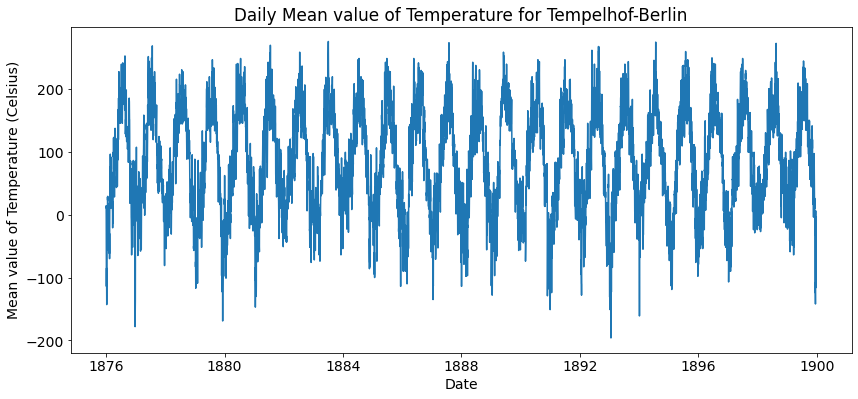

In [132]:
x = df_tem_mean.iloc[:8760, 2]
y = df_tem_mean.iloc[:8760, 3]
plt.plot(x, y)
plt.title('Daily Mean value of Temperature for Tempelhof-Berlin')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

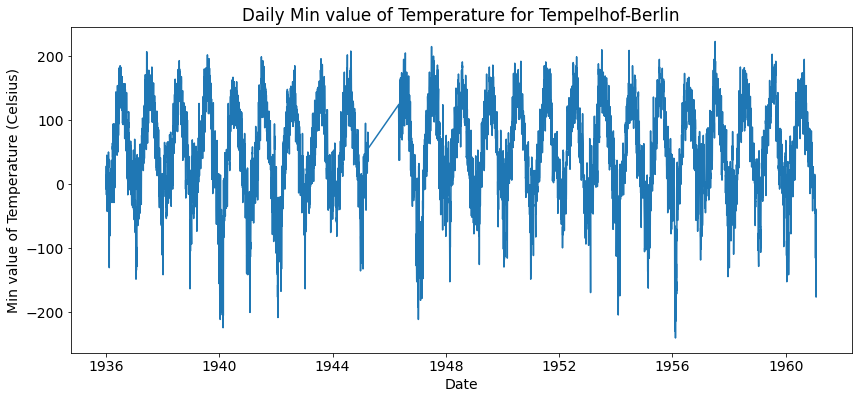

In [133]:
x = df_tem_min.iloc[:8760, 2]
y = df_tem_min.iloc[:8760, 3]
plt.plot(x, y)
plt.title('Daily Min value of Temperature for Tempelhof-Berlin')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

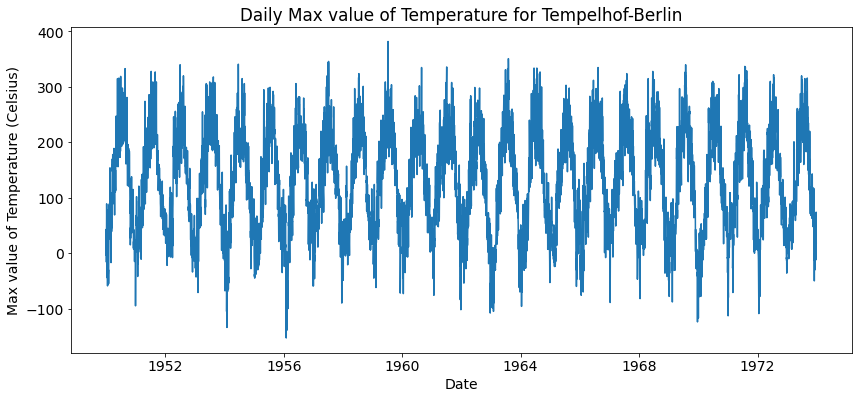

In [134]:
x = df_tem_max.iloc[:8760, 2]
y = df_tem_max.iloc[:8760, 3]
plt.plot(x, y)
plt.title('Daily Max value of Temperature for Tempelhof-Berlin')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

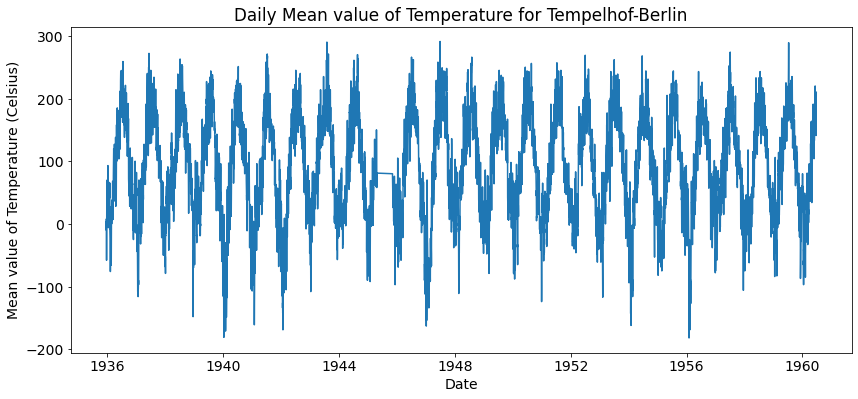

In [135]:
# Checking 1946 data in the mean values
x = df_tem_mean.iloc[21900:30660, 2]
y = df_tem_mean.iloc[21900:30660, 3]
plt.plot(x, y)
plt.title('Daily Mean value of Temperature for Tempelhof-Berlin')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Date')

## Creating the time series dataframes

In [136]:
def time_series_df(df):
    """
    This function will remove the extra columns in the data frame and sets the date column as index.
    This function also drops the data before the year 1950 because we have a gap in year 1945-1947.
    """
    df.drop(['STAID', 'SOUID'], axis=1, inplace=True )
    df.drop(columns=df.columns[-1], axis=1, inplace=True)
    df.set_index("DATE", inplace=True)
    df = df.loc["1950-01-01":]
    df = df.div(10)
    return df

In [137]:
df_tem_mean = time_series_df(df_tem_mean)
df_tem_mean

TG
DATE           
1950-01-01 -4.0
1950-01-02  0.7
1950-01-03  2.9
1950-01-04 -0.4
1950-01-05 -3.5
...         ...
2019-02-24  5.1
2019-02-25  7.3
2019-02-26  7.7
2019-02-27  8.5
2019-02-28  9.9

[25261 rows x 1 columns]

In [138]:
df_tem_min = time_series_df(df_tem_min)
df_tem_min

TN
DATE           
1950-01-01 -5.5
1950-01-02 -4.6
1950-01-03  1.1
1950-01-04 -1.2
1950-01-05 -4.2
...         ...
2019-02-24 -2.7
2019-02-25  0.9
2019-02-26  3.7
2019-02-27  0.5
2019-02-28  6.6

[25261 rows x 1 columns]

In [139]:
df_tem_max = time_series_df(df_tem_max)
df_tem_max

TX
DATE            
1950-01-01  -1.5
1950-01-02   1.6
1950-01-03   4.3
1950-01-04   2.9
1950-01-05  -0.4
...          ...
2019-02-24  13.2
2019-02-25  14.0
2019-02-26  11.9
2019-02-27  16.7
2019-02-28  13.0

[16129 rows x 1 columns]

In [140]:
df_tem_mean.shape

(25261, 1)

In [141]:
df_tem_min.shape

(25261, 1)

In [142]:
df_tem_max.shape

(16129, 1)

Text(0.5, 0, 'Date')

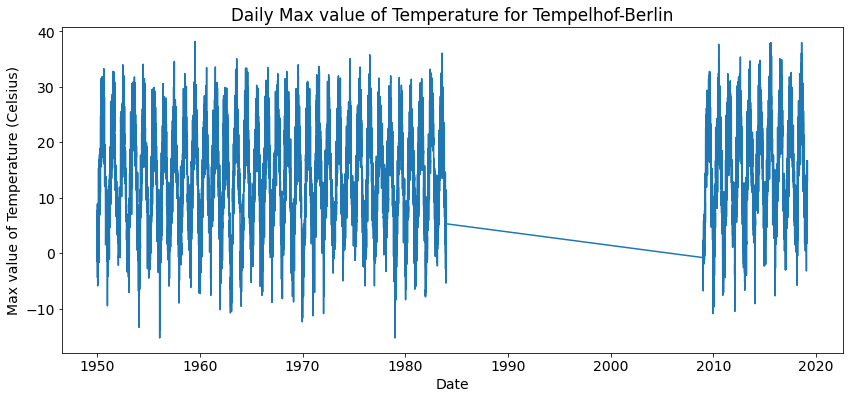

In [143]:
# x = df_tem_max.iloc[:8760, 2]
# y = df_tem_max.iloc[:8760, 3]
plt.plot(df_tem_max)
plt.title('Daily Max value of Temperature for Tempelhof-Berlin')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Date')

# Train-Test split

In [144]:
df_tem_mean_train = df_tem_mean[:"2017-12-31"]
df_tem_mean_test = df_tem_mean["2018-01-01":]
df_tem_mean_train.shape, df_tem_mean_test.shape

((24837, 1), (424, 1))

In [145]:
df_tem_min_train = df_tem_min[:"2017-12-31"]
df_tem_min_test = df_tem_min["2018-01-01":]
df_tem_min_train.shape, df_tem_min_test.shape

((24837, 1), (424, 1))

In [146]:
df_tem_max_train = df_tem_max[:"1980-12-01"]
df_tem_max_test1 = df_tem_max["1981-01-01":"1983-12-31"]
df_tem_max_test2 = df_tem_max["2009-01-01":]
df_tem_max_train.shape, df_tem_max_test1.shape, df_tem_max_test2.shape

((11293, 1), (1095, 1), (3711, 1))

In [147]:
df_tem_mean_train["month"] = df_tem_mean_train.index.month
df_tem_mean_train["year"] = df_tem_mean_train.index.year
# df_tem_mean_train = round(df_tem_mean_train.groupby(["year","month"], as_index=False).mean(), 2)
df_tem_mean_train.head()

/tmp/ipykernel_194085/1680665541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_mean_train["month"] = df_tem_mean_train.index.month
/tmp/ipykernel_194085/1680665541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_mean_train["year"] = df_tem_mean_train.index.year


TG  month  year
DATE                        
1950-01-01 -4.0      1  1950
1950-01-02  0.7      1  1950
1950-01-03  2.9      1  1950
1950-01-04 -0.4      1  1950
1950-01-05 -3.5      1  1950

In [148]:
df_tem_min_train["month"] = df_tem_min_train.index.month
df_tem_min_train["year"] = df_tem_min_train.index.year
# df_tem_min_train = round(df_tem_min_train.groupby(["year", "month"], as_index=False).mean(), 2)
df_tem_min_train.head()

/tmp/ipykernel_194085/1738169577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_min_train["month"] = df_tem_min_train.index.month
/tmp/ipykernel_194085/1738169577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_min_train["year"] = df_tem_min_train.index.year


TN  month  year
DATE                        
1950-01-01 -5.5      1  1950
1950-01-02 -4.6      1  1950
1950-01-03  1.1      1  1950
1950-01-04 -1.2      1  1950
1950-01-05 -4.2      1  1950

In [149]:
df_tem_max_train["month"] = df_tem_max_train.index.month
df_tem_max_train["year"] = df_tem_max_train.index.year
# df_tem_max_train = round(df_tem_max_train.groupby(["year", "month"], as_index=False).mean(), 2)
df_tem_max_train.head()

/tmp/ipykernel_194085/2859116448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_train["month"] = df_tem_max_train.index.month
/tmp/ipykernel_194085/2859116448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_train["year"] = df_tem_max_train.index.year


TX  month  year
DATE                        
1950-01-01 -1.5      1  1950
1950-01-02  1.6      1  1950
1950-01-03  4.3      1  1950
1950-01-04  2.9      1  1950
1950-01-05 -0.4      1  1950

# Model the trend

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
df_tem_mean_train["timestep"] = range(len(df_tem_mean_train))
df_tem_mean_train.head()

/tmp/ipykernel_194085/1430955977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_mean_train["timestep"] = range(len(df_tem_mean_train))


TG  month  year  timestep
DATE                                  
1950-01-01 -4.0      1  1950         0
1950-01-02  0.7      1  1950         1
1950-01-03  2.9      1  1950         2
1950-01-04 -0.4      1  1950         3
1950-01-05 -3.5      1  1950         4

In [152]:
df_tem_min_train["timestep"] = range(len(df_tem_min_train))
df_tem_min_train.head()

/tmp/ipykernel_194085/2688410397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_min_train["timestep"] = range(len(df_tem_min_train))


TN  month  year  timestep
DATE                                  
1950-01-01 -5.5      1  1950         0
1950-01-02 -4.6      1  1950         1
1950-01-03  1.1      1  1950         2
1950-01-04 -1.2      1  1950         3
1950-01-05 -4.2      1  1950         4

In [153]:
df_tem_max_train["timestep"] = range(len(df_tem_max_train))
df_tem_max_train.head()

/tmp/ipykernel_194085/2054174885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_train["timestep"] = range(len(df_tem_max_train))


TX  month  year  timestep
DATE                                  
1950-01-01 -1.5      1  1950         0
1950-01-02  1.6      1  1950         1
1950-01-03  4.3      1  1950         2
1950-01-04  2.9      1  1950         3
1950-01-05 -0.4      1  1950         4

In [154]:
X_temp_mean_train = df_tem_mean_train[['timestep']] 
y_temp_mean_train = df_tem_mean_train['TG']

In [155]:
X_temp_min_train = df_tem_min_train[['timestep']] 
y_temp_min_train = df_tem_min_train['TN']

In [156]:
X_temp_max_train = df_tem_max_train[['timestep']] 
y_temp_max_train = df_tem_max_train['TX']

In [157]:
m_tr = LinearRegression()

In [158]:
m_tr.fit(X_temp_mean_train,y_temp_mean_train)
m_tr.fit(X_temp_min_train,y_temp_min_train )
m_tr.fit(X_temp_max_train,y_temp_max_train)

LinearRegression()

In [159]:
df_tem_mean_train['trend'] = m_tr.predict(X_temp_mean_train)
df_tem_min_train['trend'] = m_tr.predict(X_temp_min_train)
df_tem_max_train['trend'] = m_tr.predict(X_temp_max_train)

/tmp/ipykernel_194085/2760930841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_mean_train['trend'] = m_tr.predict(X_temp_mean_train)
/tmp/ipykernel_194085/2760930841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_min_train['trend'] = m_tr.predict(X_temp_min_train)
/tmp/ipykernel_194085/2760930841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

Text(0.5, 0, 'Year')

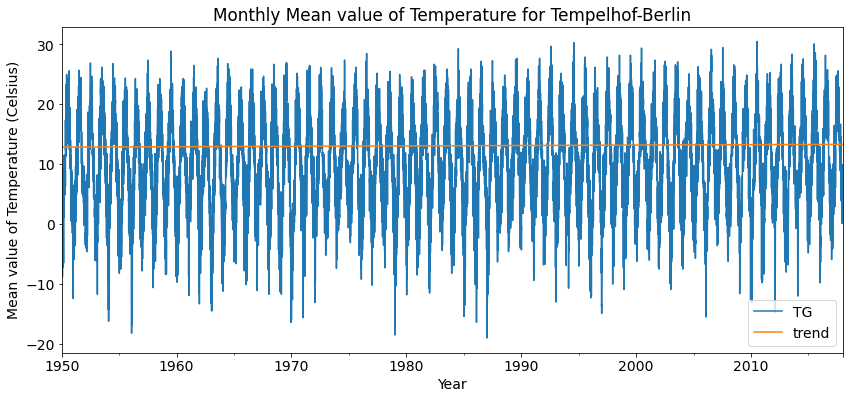

In [160]:
df_tem_mean_train[['TG','trend']].plot()
plt.title('Monthly Mean value of Temperature for Tempelhof-Berlin')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

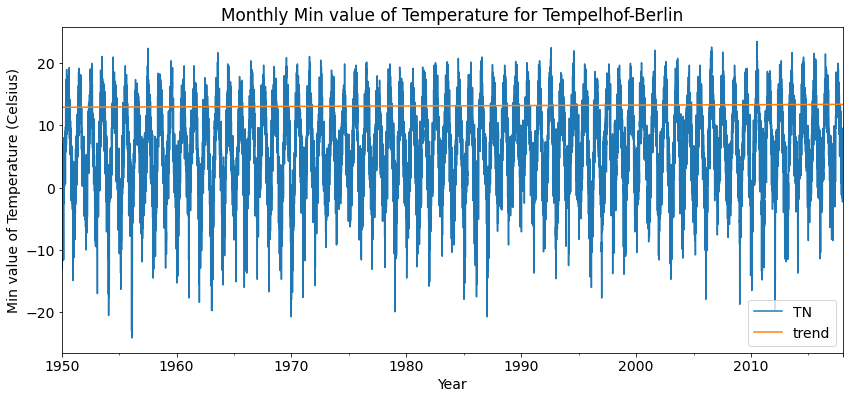

In [161]:
df_tem_min_train[['TN','trend']].plot()
plt.title('Monthly Min value of Temperature for Tempelhof-Berlin')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

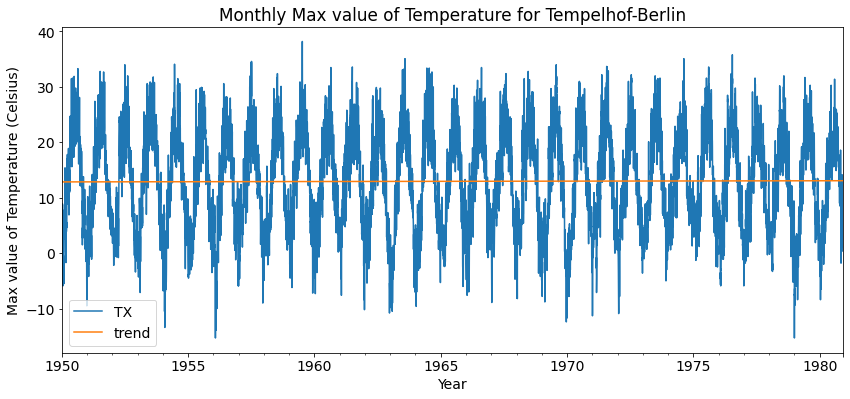

In [162]:
df_tem_max_train[['TX','trend']].plot()
plt.title('Monthly Max value of Temperature for Tempelhof-Berlin')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Year')

# Model the seasonality and trend

In [163]:
# One-Hot-Encoding the month for mean values
seasonal_dummies_tem_mean_train = pd.get_dummies(df_tem_mean_train.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(df_tem_mean_train.index)
seasonal_dummies_tem_mean_train

month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
DATE                                                                        
1950-01-01        0        0        0        0        0        0        0   
1950-01-02        0        0        0        0        0        0        0   
1950-01-03        0        0        0        0        0        0        0   
1950-01-04        0        0        0        0        0        0        0   
1950-01-05        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2017-12-27        0        0        0        0        0        0        0   
2017-12-28        0        0        0        0        0        0        0   
2017-12-29        0        0        0        0        0        0        0   
2017-12-30        0        0        0        0        0        0        0   
2017-12-31        0        0        0        0        0        0        0   

            month_9  month_10  month_11  month_12  
DATE                                               
1950-01-01        0         0         0         0  
1950-01-02        0         0         0         0  
1950-01-03        0         0         0         0  
1950-01-04        0         0         0         0  
1950-01-05        0         0         0         0  
...             ...       ...       ...       ...  
2017-12-27        0         0         0         1  
2017-12-28        0         0         0         1  
2017-12-29        0         0         0         1  
2017-12-30        0         0         0         1  
2017-12-31        0         0         0         1  

[24837 rows x 11 columns]

In [164]:
df_tem_mean_train = df_tem_mean_train.join(seasonal_dummies_tem_mean_train)
df_tem_mean_train

TG  month  year  timestep      trend  month_2  month_3  month_4  \
DATE                                                                           
1950-01-01 -4.0      1  1950         0  12.860637        0        0        0   
1950-01-02  0.7      1  1950         1  12.860655        0        0        0   
1950-01-03  2.9      1  1950         2  12.860674        0        0        0   
1950-01-04 -0.4      1  1950         3  12.860693        0        0        0   
1950-01-05 -3.5      1  1950         4  12.860712        0        0        0   
...         ...    ...   ...       ...        ...      ...      ...      ...   
2017-12-27  3.0     12  2017     24832  13.325467        0        0        0   
2017-12-28  3.1     12  2017     24833  13.325486        0        0        0   
2017-12-29  1.7     12  2017     24834  13.325505        0        0        0   
2017-12-30  2.7     12  2017     24835  13.325524        0        0        0   
2017-12-31  9.5     12  2017     24836  13.325542        0        0        0   

            month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
DATE                                                                          
1950-01-01        0        0        0        0        0         0         0   
1950-01-02        0        0        0        0        0         0         0   
1950-01-03        0        0        0        0        0         0         0   
1950-01-04        0        0        0        0        0         0         0   
1950-01-05        0        0        0        0        0         0         0   
...             ...      ...      ...      ...      ...       ...       ...   
2017-12-27        0        0        0        0        0         0         0   
2017-12-28        0        0        0        0        0         0         0   
2017-12-29        0        0        0        0        0         0         0   
2017-12-30        0        0        0        0        0         0         0   
2017-12-31        0        0        0        0        0         0         0   

            month_12  
DATE                  
1950-01-01         0  
1950-01-02         0  
1950-01-03         0  
1950-01-04         0  
1950-01-05         0  
...              ...  
2017-12-27         1  
2017-12-28         1  
2017-12-29         1  
2017-12-30         1  
2017-12-31         1  

[24837 rows x 16 columns]

In [165]:
# One-Hot-Encoding the month for min values
seasonal_dummies_tem_min_train = pd.get_dummies(df_tem_min_train.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(df_tem_min_train.index)
df_tem_min_train = df_tem_min_train.join(seasonal_dummies_tem_min_train)

In [166]:
# One-Hot-Encoding the month for max values
seasonal_dummies_tem_max_train = pd.get_dummies(df_tem_max_train.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(df_tem_max_train.index)
df_tem_max_train = df_tem_max_train.join(seasonal_dummies_tem_max_train)

In [167]:
# Define X and y
X_temp_mean_train = df_tem_mean_train.drop(columns=['TG', 'year', 'month', 'trend'])
y_temp_mean_train = df_tem_mean_train['TG']

In [168]:
X_temp_min_train = df_tem_min_train.drop(columns=['TN', 'year', 'month', 'trend'])
y_temp_min_train = df_tem_min_train['TN']

In [169]:
X_temp_max_train = df_tem_max_train.drop(columns=['TX', 'year', 'month', 'trend'])
y_temp_max_train = df_tem_max_train['TX']

In [170]:
# Create a model with trend and seasonality
m_se_tr = LinearRegression()
m_se_tr.fit(X_temp_mean_train, y_temp_mean_train)
df_tem_mean_train['trend + seasonal'] = m_se_tr.predict(X_temp_mean_train)
df_tem_mean_train.head()

TG  month  year  timestep      trend  month_2  month_3  month_4  \
DATE                                                                           
1950-01-01 -4.0      1  1950         0  12.860637        0        0        0   
1950-01-02  0.7      1  1950         1  12.860655        0        0        0   
1950-01-03  2.9      1  1950         2  12.860674        0        0        0   
1950-01-04 -0.4      1  1950         3  12.860693        0        0        0   
1950-01-05 -3.5      1  1950         4  12.860712        0        0        0   

            month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
DATE                                                                          
1950-01-01        0        0        0        0        0         0         0   
1950-01-02        0        0        0        0        0         0         0   
1950-01-03        0        0        0        0        0         0         0   
1950-01-04        0        0        0        0        0         0         0   
1950-01-05        0        0        0        0        0         0         0   

            month_12  trend + seasonal  
DATE                                    
1950-01-01         0         -0.750427  
1950-01-02         0         -0.750350  
1950-01-03         0         -0.750273  
1950-01-04         0         -0.750196  
1950-01-05         0         -0.750120

In [171]:
m_se_tr.fit(X_temp_min_train, y_temp_min_train)
df_tem_min_train['trend + seasonal'] = m_se_tr.predict(X_temp_min_train)
df_tem_min_train.head()

TN  month  year  timestep      trend  month_2  month_3  month_4  \
DATE                                                                           
1950-01-01 -5.5      1  1950         0  12.860637        0        0        0   
1950-01-02 -4.6      1  1950         1  12.860655        0        0        0   
1950-01-03  1.1      1  1950         2  12.860674        0        0        0   
1950-01-04 -1.2      1  1950         3  12.860693        0        0        0   
1950-01-05 -4.2      1  1950         4  12.860712        0        0        0   

            month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
DATE                                                                          
1950-01-01        0        0        0        0        0         0         0   
1950-01-02        0        0        0        0        0         0         0   
1950-01-03        0        0        0        0        0         0         0   
1950-01-04        0        0        0        0        0         0         0   
1950-01-05        0        0        0        0        0         0         0   

            month_12  trend + seasonal  
DATE                                    
1950-01-01         0         -3.071755  
1950-01-02         0         -3.071688  
1950-01-03         0         -3.071621  
1950-01-04         0         -3.071554  
1950-01-05         0         -3.071487

In [172]:
m_se_tr.fit(X_temp_max_train, y_temp_max_train)
df_tem_max_train['trend + seasonal'] = m_se_tr.predict(X_temp_max_train)
df_tem_max_train.head()

TX  month  year  timestep      trend  month_2  month_3  month_4  \
DATE                                                                           
1950-01-01 -1.5      1  1950         0  12.860637        0        0        0   
1950-01-02  1.6      1  1950         1  12.860655        0        0        0   
1950-01-03  4.3      1  1950         2  12.860674        0        0        0   
1950-01-04  2.9      1  1950         3  12.860693        0        0        0   
1950-01-05 -0.4      1  1950         4  12.860712        0        0        0   

            month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
DATE                                                                          
1950-01-01        0        0        0        0        0         0         0   
1950-01-02        0        0        0        0        0         0         0   
1950-01-03        0        0        0        0        0         0         0   
1950-01-04        0        0        0        0        0         0         0   
1950-01-05        0        0        0        0        0         0         0   

            month_12  trend + seasonal  
DATE                                    
1950-01-01         0          1.883394  
1950-01-02         0          1.883384  
1950-01-03         0          1.883373  
1950-01-04         0          1.883363  
1950-01-05         0          1.883352

Text(0.5, 0, 'Year')

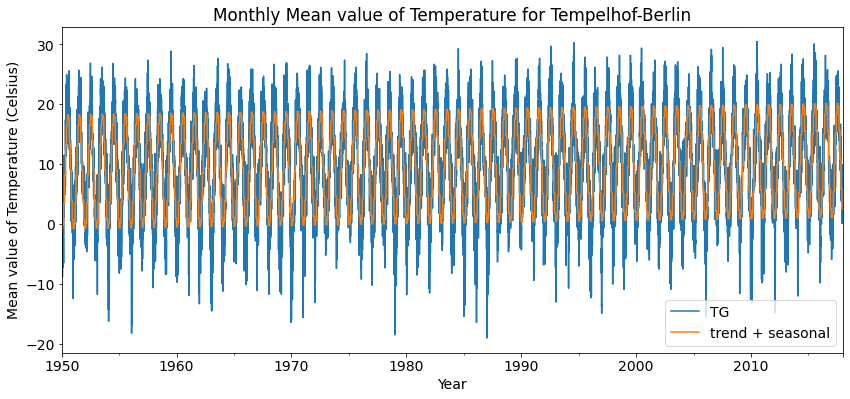

In [173]:
df_tem_mean_train[['TG', 'trend + seasonal']].plot()
plt.title('Monthly Mean value of Temperature for Tempelhof-Berlin')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

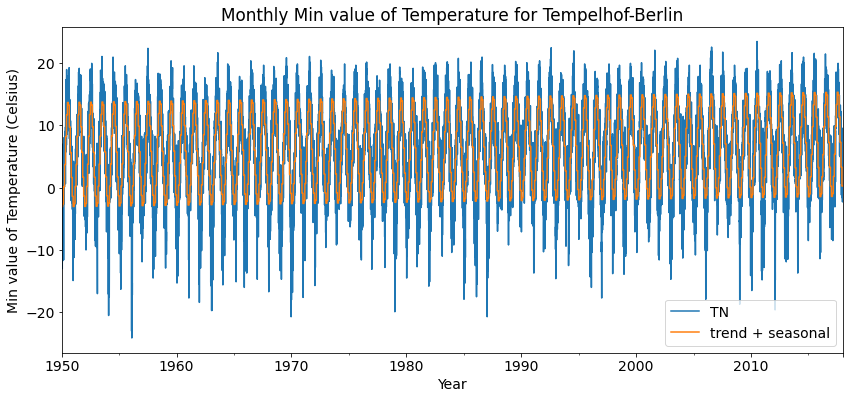

In [174]:
df_tem_min_train[['TN', 'trend + seasonal']].plot()
plt.title('Monthly Min value of Temperature for Tempelhof-Berlin')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

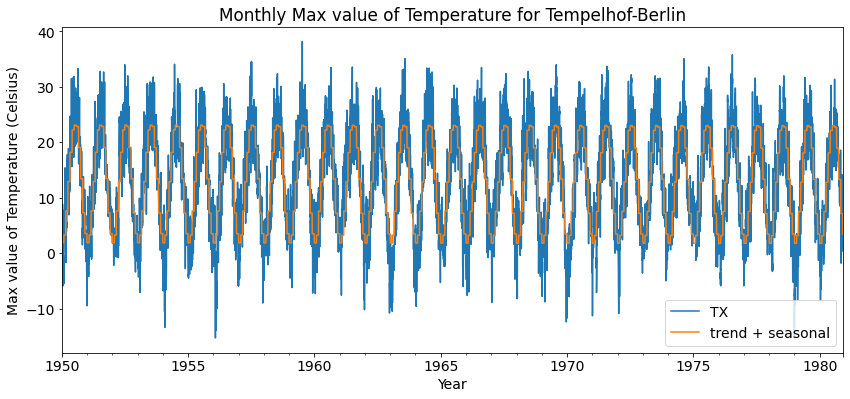

In [175]:
df_tem_max_train[['TX', 'trend + seasonal']].plot()
plt.title('Monthly Max value of Temperature for Tempelhof-Berlin')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Year')

# Extract the remainder

<AxesSubplot:xlabel='DATE'>

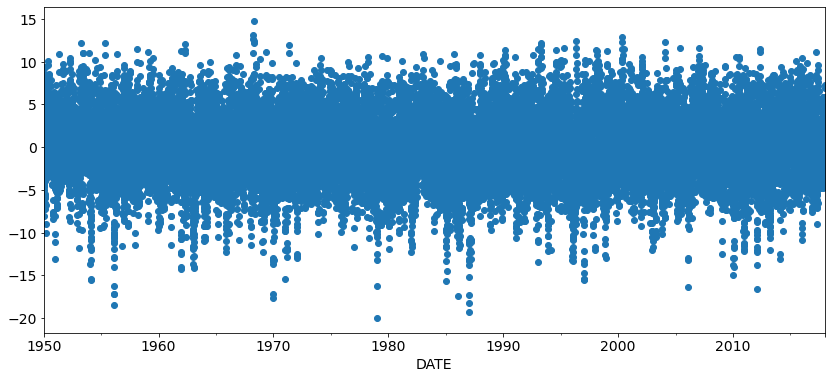

In [176]:
df_tem_mean_train['remainder'] = df_tem_mean_train['TG'] - df_tem_mean_train['trend + seasonal']
df_tem_mean_train['remainder'].plot(style='o')

In [177]:
df_tem_mean_train['remainder'].to_csv('df_tem_mean_train_remainder.csv')
!ls -al df_tem_mean_train_remainder.csv

-rw-rw-r-- 1 esharifi esharifi 746784 Aug 26 14:23 df_tem_mean_train_remainder.csv


<AxesSubplot:xlabel='DATE'>

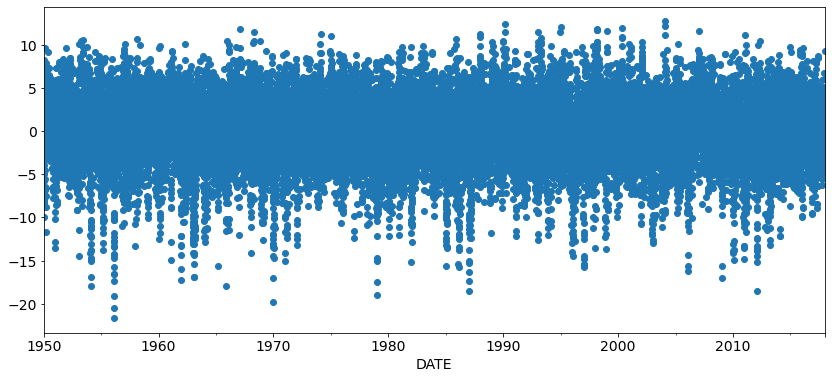

In [178]:
df_tem_min_train['remainder'] = df_tem_min_train['TN'] - df_tem_min_train['trend + seasonal']
df_tem_min_train['remainder'].plot(style='o')

In [179]:
df_tem_min_train['remainder'].to_csv('df_tem_min_train_remainder.csv')
!ls -al df_tem_min_train_remainder.csv

-rw-rw-r-- 1 esharifi esharifi 747029 Aug 26 14:23 df_tem_min_train_remainder.csv


<AxesSubplot:xlabel='DATE'>

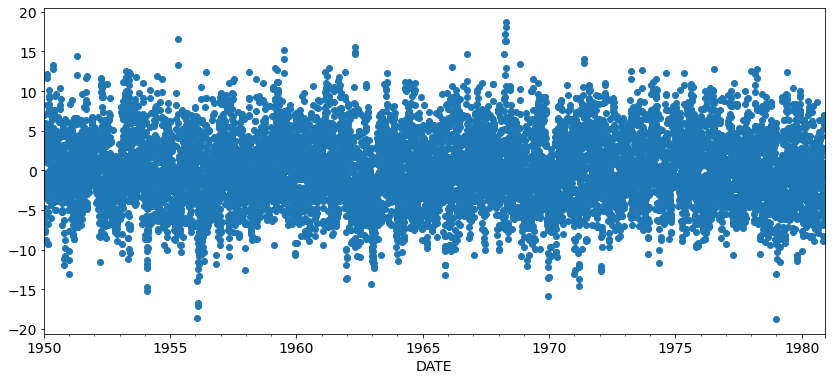

In [180]:
df_tem_max_train['remainder'] = df_tem_max_train['TX'] - df_tem_max_train['trend + seasonal']
df_tem_max_train['remainder'].plot(style='o')

In [181]:
df_tem_max_train['remainder'].to_csv('df_tem_max_train_remainder.csv')
!ls -al df_tem_max_train_remainder.csv

-rw-rw-r-- 1 esharifi esharifi 339130 Aug 26 14:23 df_tem_max_train_remainder.csv


# Modelling Autoregression for just Remainder

## Load the remainder data

In [182]:
import seaborn as sns

from statsmodels.api import OLS, add_constant, qqplot
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_pacf

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['font.size'] = '14'

In [183]:
remainder_tem_mean_train= pd.read_csv('df_tem_mean_train_remainder.csv', index_col=0, parse_dates=True)
remainder_tem_mean_train.head()

remainder
DATE                 
1950-01-01  -3.249573
1950-01-02   1.450350
1950-01-03   3.650273
1950-01-04   0.350196
1950-01-05  -2.749880

In [184]:
remainder_tem_min_train= pd.read_csv('df_tem_min_train_remainder.csv', index_col=0, parse_dates=True)
remainder_tem_min_train.head()

remainder
DATE                 
1950-01-01  -2.428245
1950-01-02  -1.528312
1950-01-03   4.171621
1950-01-04   1.871554
1950-01-05  -1.128513

In [185]:
remainder_tem_max_train= pd.read_csv('df_tem_max_train_remainder.csv', index_col=0, parse_dates=True)
remainder_tem_max_train.head()

remainder
DATE                 
1950-01-01  -3.383394
1950-01-02  -0.283384
1950-01-03   2.416627
1950-01-04   1.016637
1950-01-05  -2.283352

## Create a time-lagged input feature: lag1

In [186]:
remainder_tem_mean_train['lag1'] = remainder_tem_mean_train['remainder'].shift(1)

remainder_tem_mean_train.head()

remainder      lag1
DATE                           
1950-01-01  -3.249573       NaN
1950-01-02   1.450350 -3.249573
1950-01-03   3.650273  1.450350
1950-01-04   0.350196  3.650273
1950-01-05  -2.749880  0.350196

In [187]:
remainder_tem_min_train['lag1'] = remainder_tem_min_train['remainder'].shift(1)

remainder_tem_min_train.head()

remainder      lag1
DATE                           
1950-01-01  -2.428245       NaN
1950-01-02  -1.528312 -2.428245
1950-01-03   4.171621 -1.528312
1950-01-04   1.871554  4.171621
1950-01-05  -1.128513  1.871554

In [188]:
remainder_tem_max_train['lag1'] = remainder_tem_max_train['remainder'].shift(1)

remainder_tem_max_train.head()

remainder      lag1
DATE                           
1950-01-01  -3.383394       NaN
1950-01-02  -0.283384 -3.383394
1950-01-03   2.416627 -0.283384
1950-01-04   1.016637  2.416627
1950-01-05  -2.283352  1.016637

## Inspect correlations

In [189]:
round(remainder_tem_mean_train.corr(), 2)

remainder  lag1
remainder       1.00  0.81
lag1            0.81  1.00

In [190]:
round(remainder_tem_min_train.corr(), 2)

remainder  lag1
remainder       1.00  0.76
lag1            0.76  1.00

In [191]:
round(remainder_tem_max_train.corr(), 2)

remainder  lag1
remainder       1.00  0.77
lag1            0.77  1.00

## Plot remainder against lag1

Text(0, 0.5, 'remainder')

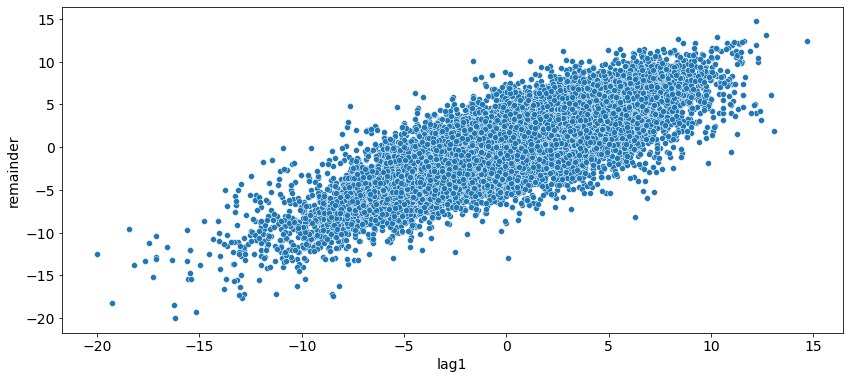

In [192]:
sns.scatterplot(x='lag1', y='remainder', data=remainder_tem_mean_train);
plt.xlabel('lag1')
plt.ylabel('remainder')

Text(0, 0.5, 'remainder')

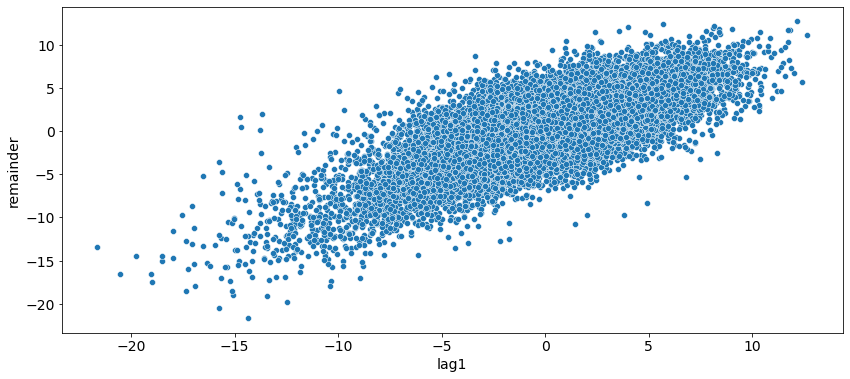

In [193]:
sns.scatterplot(x='lag1', y='remainder', data=remainder_tem_min_train);
plt.xlabel('lag1')
plt.ylabel('remainder')

Text(0, 0.5, 'remainder')

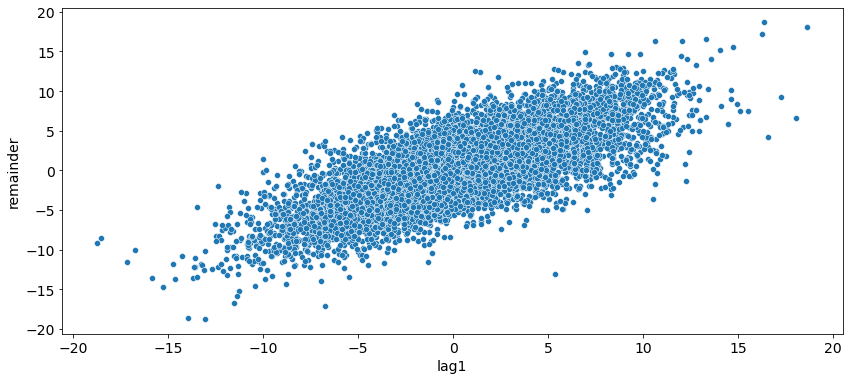

In [194]:
sns.scatterplot(x='lag1', y='remainder', data=remainder_tem_max_train);
plt.xlabel('lag1')
plt.ylabel('remainder')

## Run an Autoregression (Linear Regression) of lag1 on the remainder

In [195]:
# Drop missing values
remainder_tem_mean_train.dropna(inplace = True)
remainder_tem_mean_train.head()

remainder      lag1
DATE                           
1950-01-02   1.450350 -3.249573
1950-01-03   3.650273  1.450350
1950-01-04   0.350196  3.650273
1950-01-05  -2.749880  0.350196
1950-01-06   2.950043 -2.749880

In [196]:
remainder_tem_min_train.dropna(inplace = True)
remainder_tem_min_train.head()

remainder      lag1
DATE                           
1950-01-02  -1.528312 -2.428245
1950-01-03   4.171621 -1.528312
1950-01-04   1.871554  4.171621
1950-01-05  -1.128513  1.871554
1950-01-06  -1.828580 -1.128513

In [197]:
remainder_tem_max_train.dropna(inplace = True)
remainder_tem_max_train.head()

remainder      lag1
DATE                           
1950-01-02  -0.283384 -3.383394
1950-01-03   2.416627 -0.283384
1950-01-04   1.016637  2.416627
1950-01-05  -2.283352  1.016637
1950-01-06   3.316659 -2.283352

In [198]:
# Assign X and y
X_tem_mean_train_ar = remainder_tem_mean_train[['lag1']]
y_tem_mean_train_ar = remainder_tem_mean_train['remainder']

In [199]:
X_tem_min_train_ar = remainder_tem_min_train[['lag1']]
y_tem_min_train_ar = remainder_tem_min_train['remainder']

In [200]:
X_tem_max_train_ar = remainder_tem_max_train[['lag1']]
y_tem_max_train_ar = remainder_tem_max_train['remainder']

In [201]:
m_re = LinearRegression()
m_re.fit(X_tem_mean_train_ar, y_tem_mean_train_ar)
m_re.fit(X_tem_min_train_ar, y_tem_min_train_ar)
m_re.fit(X_tem_max_train_ar, y_tem_max_train_ar)

LinearRegression()

In [202]:
# Create predictions
remainder_tem_mean_train['predictions_ar1'] = m_re.predict(X_tem_mean_train_ar)
remainder_tem_mean_train.head()

remainder      lag1  predictions_ar1
DATE                                            
1950-01-02   1.450350 -3.249573        -2.489482
1950-01-03   3.650273  1.450350         1.111242
1950-01-04   0.350196  3.650273         2.796656
1950-01-05  -2.749880  0.350196         0.268388
1950-01-06   2.950043 -2.749880        -2.106655

In [203]:
remainder_tem_min_train['predictions_ar1'] = m_re.predict(X_tem_min_train_ar)
remainder_tem_min_train.head()

remainder      lag1  predictions_ar1
DATE                                            
1950-01-02  -1.528312 -2.428245        -1.860243
1950-01-03   4.171621 -1.528312        -1.170782
1950-01-04   1.871554  4.171621         3.196073
1950-01-05  -1.128513  1.871554         1.433937
1950-01-06  -1.828580 -1.128513        -0.864487

In [204]:
remainder_tem_max_train['predictions_ar1'] = m_re.predict(X_tem_max_train_ar)
remainder_tem_max_train.head()

remainder      lag1  predictions_ar1
DATE                                            
1950-01-02  -0.283384 -3.383394        -2.592005
1950-01-03   2.416627 -0.283384        -0.217013
1950-01-04   1.016637  2.416627         1.851530
1950-01-05  -2.283352  1.016637         0.778965
1950-01-06   3.316659 -2.283352        -1.749237

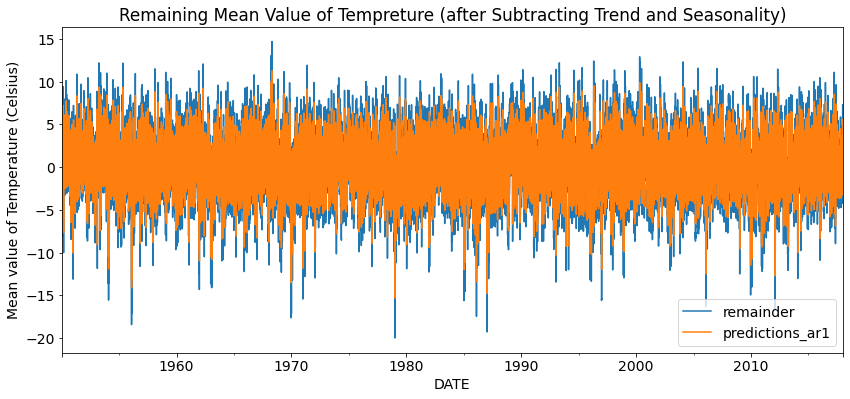

In [205]:
# Plot the original remainder and the prediction
remainder_tem_mean_train[['remainder', 'predictions_ar1']].plot()
plt.title("Remaining Mean Value of Tempreture (after Subtracting Trend and Seasonality)")
plt.ylabel("Mean value of Temperature (Celsius)")
plt.show()


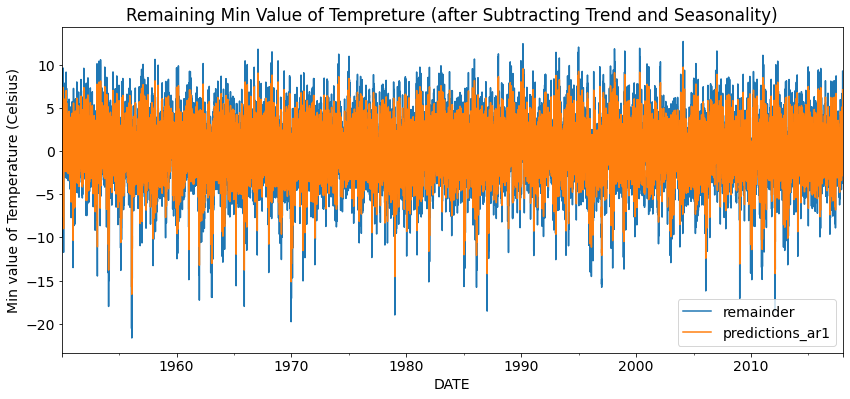

In [206]:
remainder_tem_min_train[['remainder', 'predictions_ar1']].plot()
plt.title("Remaining Min Value of Tempreture (after Subtracting Trend and Seasonality)")
plt.ylabel("Min value of Temperature (Celsius)")
plt.show()

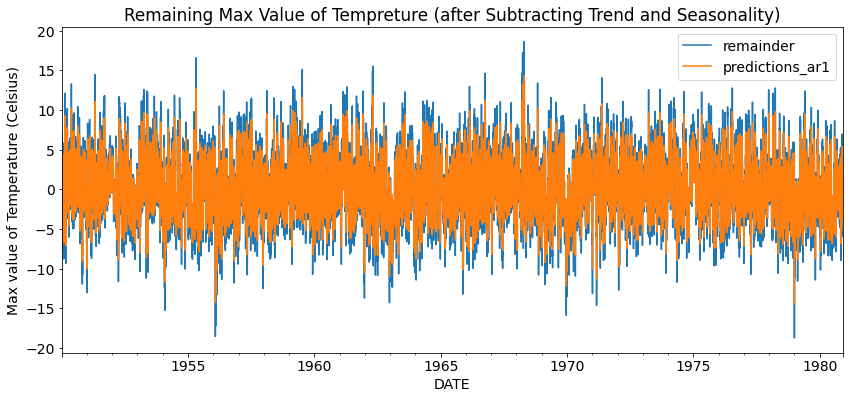

In [207]:
remainder_tem_max_train[['remainder', 'predictions_ar1']].plot()
plt.title("Remaining Max Value of Tempreture (after Subtracting Trend and Seasonality)")
plt.ylabel("Max value of Temperature (Celsius)")
plt.show()

<AxesSubplot:xlabel='DATE'>

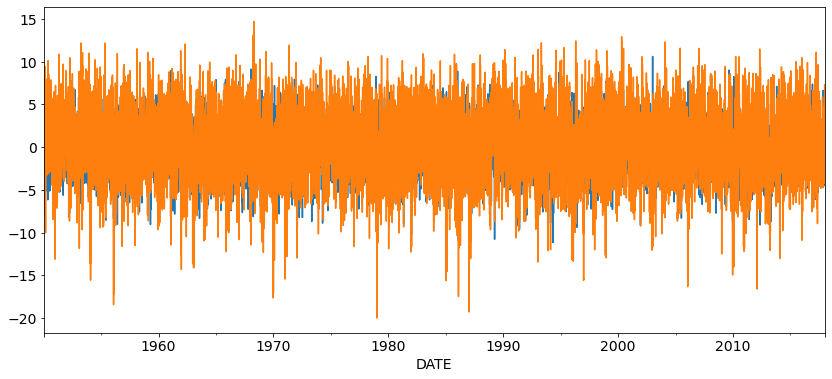

In [208]:
# Mean values: Is the remainder prediction error smaller than the remainder itself?
(remainder_tem_mean_train['remainder'] - remainder_tem_mean_train['predictions_ar1']).plot()
remainder_tem_mean_train['remainder'].plot()

In [209]:
SAE = sum(abs(number) for number in remainder_tem_mean_train['remainder'])
print(f"""SAE if we did not use AR = {SAE}""")
SAE_AR = sum(abs(number) for number in remainder_tem_mean_train['remainder'] - remainder_tem_mean_train['predictions_ar1'])
print(f"""SAE if we use AR = {SAE_AR}""")
SAE_LAG = sum(abs(number) for number in remainder_tem_mean_train['remainder'] - remainder_tem_mean_train['lag1'])
print(f"""SAE if we use remainder of prev. t to predict t+1 = {SAE_LAG}""")

#SAE: Sum of Absolute Error

SAE if we did not use AR = 77156.413959628
SAE if we use AR = 45162.71716208052
SAE if we use remainder of prev. t to predict t+1 = 46564.51565782024


<AxesSubplot:xlabel='DATE'>

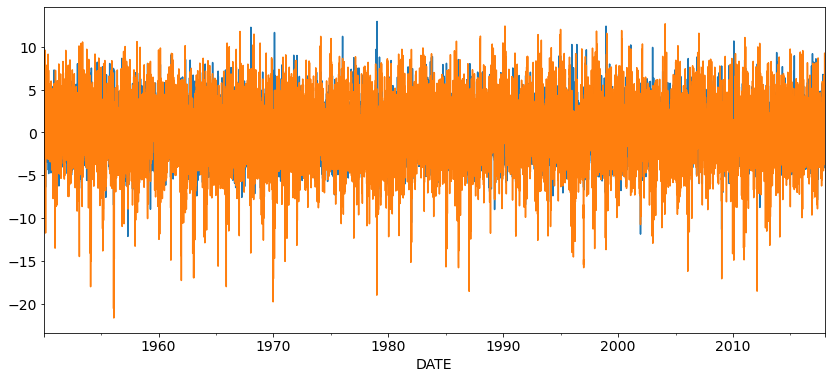

In [210]:
# Min values: Is the remainder prediction error smaller than the remainder itself?
(remainder_tem_min_train['remainder'] - remainder_tem_min_train['predictions_ar1']).plot()
remainder_tem_min_train['remainder'].plot()

In [211]:
SAE = sum(abs(number) for number in remainder_tem_min_train['remainder'])
print(f"""SAE if we did not use AR = {SAE}""")
SAE_AR = sum(abs(number) for number in remainder_tem_min_train['remainder'] - remainder_tem_min_train['predictions_ar1'])
print(f"""SAE if we use AR = {SAE_AR}""")
SAE_LAG = sum(abs(number) for number in remainder_tem_min_train['remainder'] - remainder_tem_min_train['lag1'])
print(f"""SAE if we use remainder of prev. t to predict t+1 = {SAE_LAG}""")

SAE if we did not use AR = 73411.85198031743
SAE if we use AR = 47995.90986058536
SAE if we use remainder of prev. t to predict t+1 = 50753.50322846447


<AxesSubplot:xlabel='DATE'>

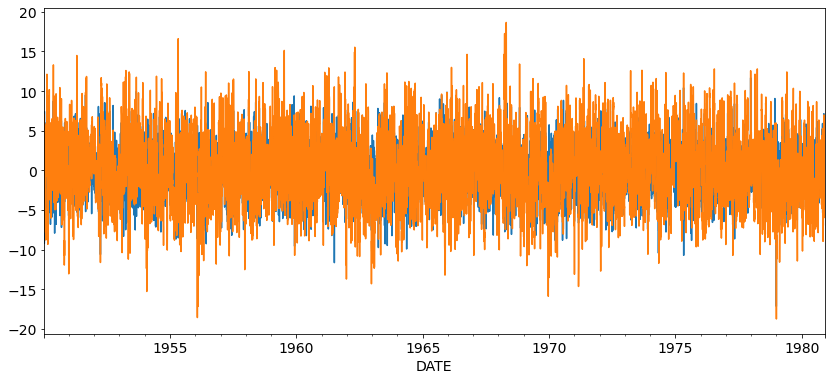

In [212]:
# Max values: Is the remainder prediction error smaller than the remainder itself?
(remainder_tem_max_train['remainder'] - remainder_tem_max_train['predictions_ar1']).plot()
remainder_tem_max_train['remainder'].plot()

In [213]:
SAE = sum(abs(number) for number in remainder_tem_max_train['remainder'])
print(f"""SAE if we did not use AR = {SAE}""")
SAE_AR = sum(abs(number) for number in remainder_tem_max_train['remainder'] - remainder_tem_max_train['predictions_ar1'])
print(f"""SAE if we use AR = {SAE_AR}""")
SAE_LAG = sum(abs(number) for number in remainder_tem_max_train['remainder'] - remainder_tem_max_train['lag1'])
print(f"""SAE if we use remainder of prev. t to predict t+1 = {SAE_LAG}""")

SAE if we did not use AR = 39919.34070179361
SAE if we use AR = 25286.79940492972
SAE if we use remainder of prev. t to predict t+1 = 26318.016967889573


## Should we add another lag (lag2)?

### Determine Partial Autocorrelation and Autocorrelation

#### Mean values

In [214]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import ar_select_order
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation - Mean Values')

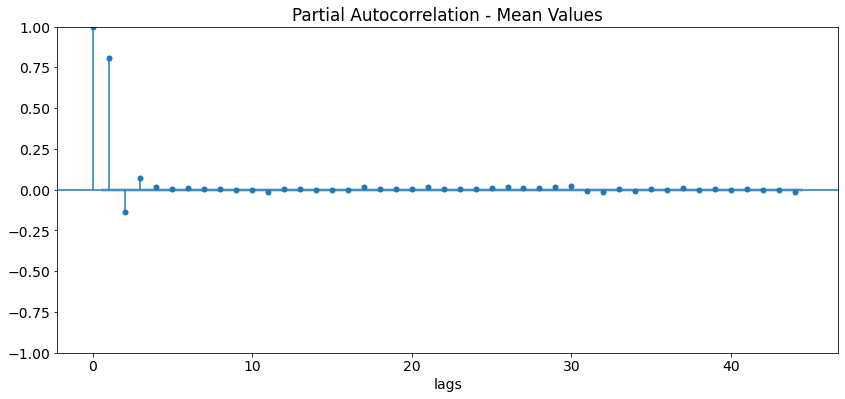

In [215]:
# plotting partial autocorrelation

plot_pacf(remainder_tem_mean_train['remainder'])
plt.xlabel('lags');
plt.title("Partial Autocorrelation - Mean Values")

Text(0.5, 1.0, 'Autocorrelation - Mean Values')

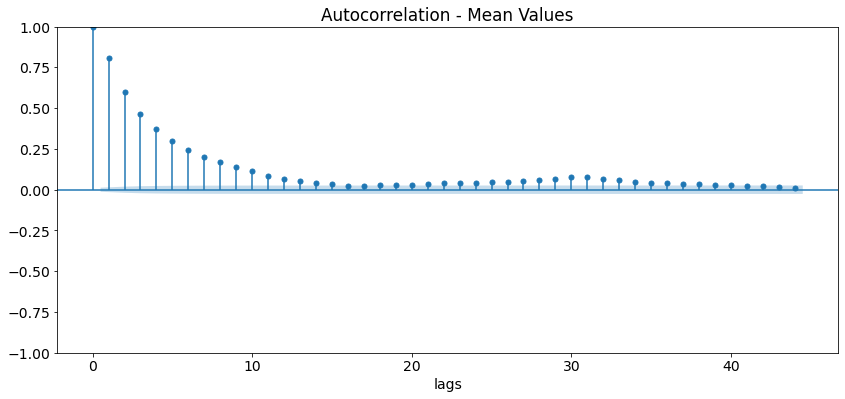

In [216]:
# plotting autocorrelation

plot_acf(remainder_tem_mean_train['remainder'])
plt.xlabel('lags');
plt.title("Autocorrelation - Mean Values")

In [217]:
order_mean = ar_select_order(remainder_tem_mean_train['remainder'], maxlag=10)
order_mean.ar_lags

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 3]

#### Min values

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation - Min Values')

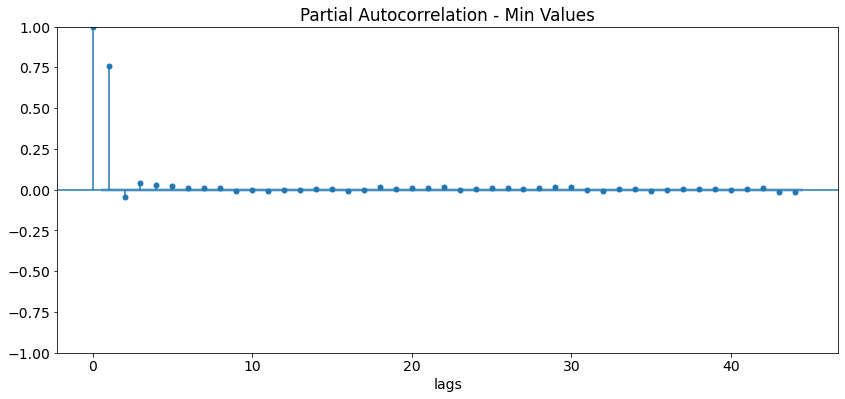

In [218]:
# plotting partial autocorrelation

plot_pacf(remainder_tem_min_train['remainder'])
plt.xlabel('lags');
plt.title("Partial Autocorrelation - Min Values")

Text(0.5, 1.0, 'Autocorrelation - Min Values')

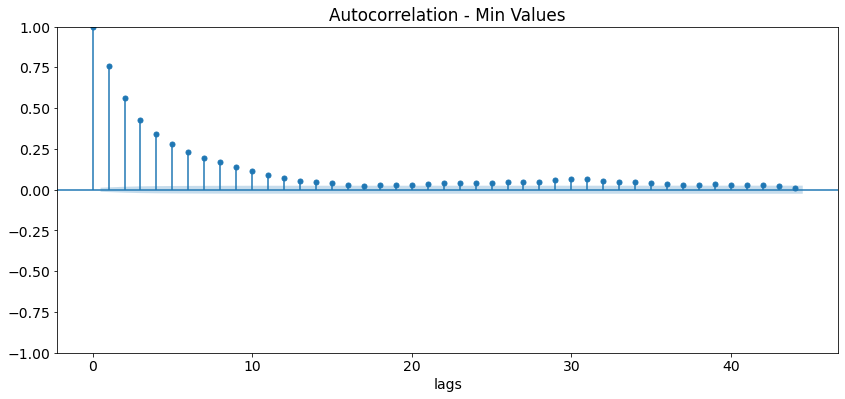

In [219]:
# plotting autocorrelation

plot_acf(remainder_tem_min_train['remainder'])
plt.xlabel('lags');
plt.title("Autocorrelation - Min Values")

In [220]:
order_min = ar_select_order(remainder_tem_min_train['remainder'], maxlag=10)
order_min.ar_lags

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 3, 4, 5]

#### Max values

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation - Max Values')

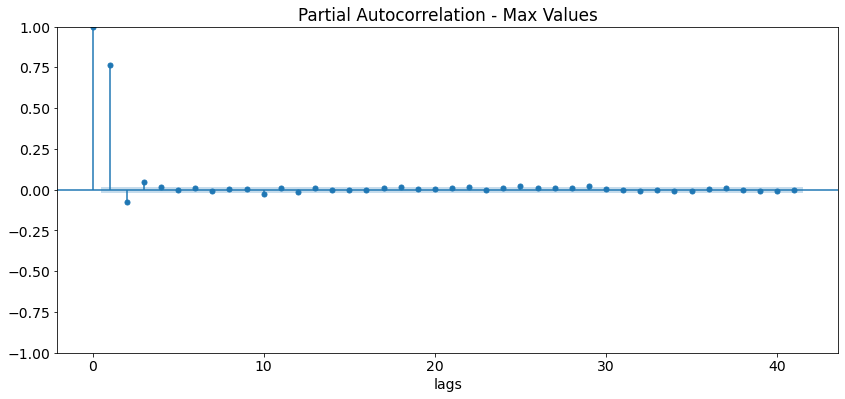

In [221]:
# plotting partial autocorrelation

plot_pacf(remainder_tem_max_train['remainder'])
plt.xlabel('lags');
plt.title("Partial Autocorrelation - Max Values")

Text(0.5, 1.0, 'Autocorrelation - Max Values')

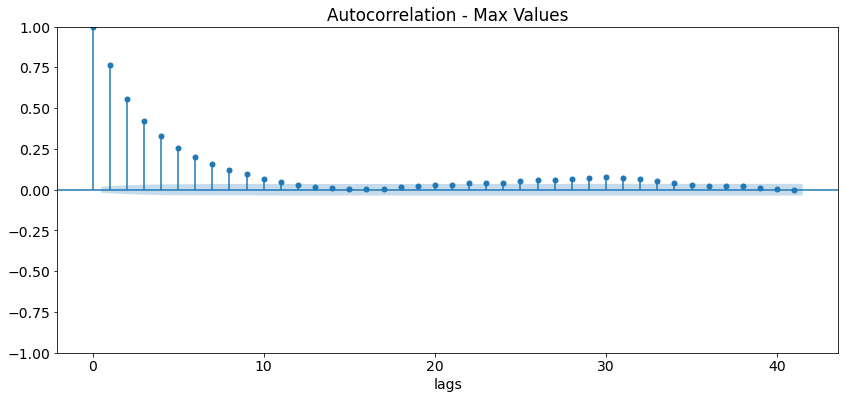

In [222]:
# plotting autocorrelation

plot_acf(remainder_tem_max_train['remainder'])
plt.xlabel('lags');
plt.title("Autocorrelation - Max Values")

In [223]:
order_max = ar_select_order(remainder_tem_max_train['remainder'], maxlag=10)
order_max.ar_lags

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 3]

# ARIMA

## Mean values

### ARIMA(1,1,1)

In [224]:
df_arima_mean = pd.DataFrame(index=remainder_tem_mean_train.index)
df_arima_mean['remainder'] = remainder_tem_mean_train['remainder']
df_arima_mean

remainder
DATE                 
1950-01-02   1.450350
1950-01-03   3.650273
1950-01-04   0.350196
1950-01-05  -2.749880
1950-01-06   2.950043
...               ...
2017-12-27   0.411104
2017-12-28   0.511027
2017-12-29  -0.889049
2017-12-30   0.110874
2017-12-31   6.910797

[24836 rows x 1 columns]

In [225]:
# Fit an ARIMA model
arima_model_mean = ARIMA(df_arima_mean, order=(1,1,1)).fit() # order is (p,d,q) or (ar,i,ma)
arima_model_mean.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              remainder   No. Observations:                24836
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -56128.566
Date:                Fri, 26 Aug 2022   AIC                         112263.131
Time:                        14:24:09   BIC                         112287.491
Sample:                    01-02-1950   HQIC                        112271.018
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8058      0.003    235.153      0.000       0.799       0.813
ma.L1         -0.9998      0.000  -6029.555      0.000      -1.000      -1.000
sigma2         5.3763      0.042    127.393      0.000       5.294       5.459
===================================================================================
Ljung-Box (L1) (Q):                 300.61   Jarque-Bera (JB):               519.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

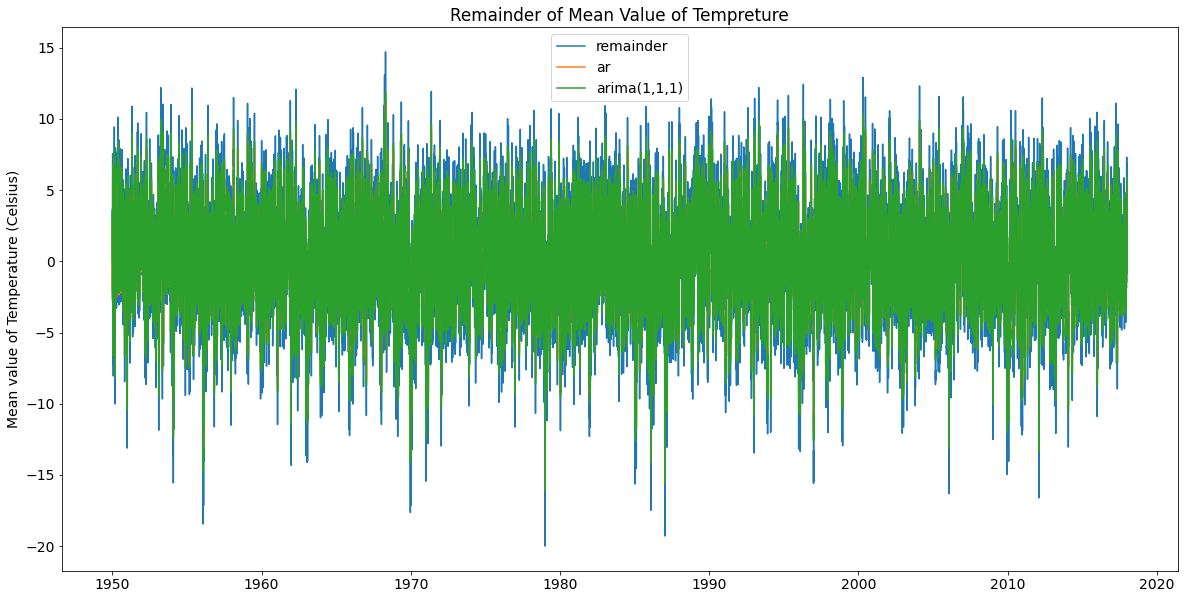

In [226]:
# Plot all time series
plt.rcParams['figure.figsize'] = (20,10)

plt.plot(remainder_tem_mean_train[['remainder']], label='remainder')
plt.plot(remainder_tem_mean_train[['predictions_ar1']], label='ar')
plt.plot(arima_model_mean.predict(), label='arima(1,1,1)')
plt.title("Remainder of Mean Value of Tempreture")
plt.ylabel("Mean value of Temperature (Celsius)")
plt.legend()
plt.show()

### ARIMA(1,2,1)

In [227]:
# Fit an ARIMA model
arima_model_mean2 = ARIMA(df_arima_mean, order=(1,2,1)).fit() # order is (p,d,q) or (ar,i,ma)
arima_model_mean2.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              remainder   No. Observations:                24836
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -57386.299
Date:                Fri, 26 Aug 2022   AIC                         114778.597
Time:                        14:24:24   BIC                         114802.957
Sample:                    01-02-1950   HQIC                        114786.484
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0263      0.006      4.248      0.000       0.014       0.038
ma.L1         -1.0000      0.030    -32.985      0.000      -1.059      -0.941
sigma2         5.9496      0.188     31.604      0.000       5.581       6.319
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):              1246.59
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

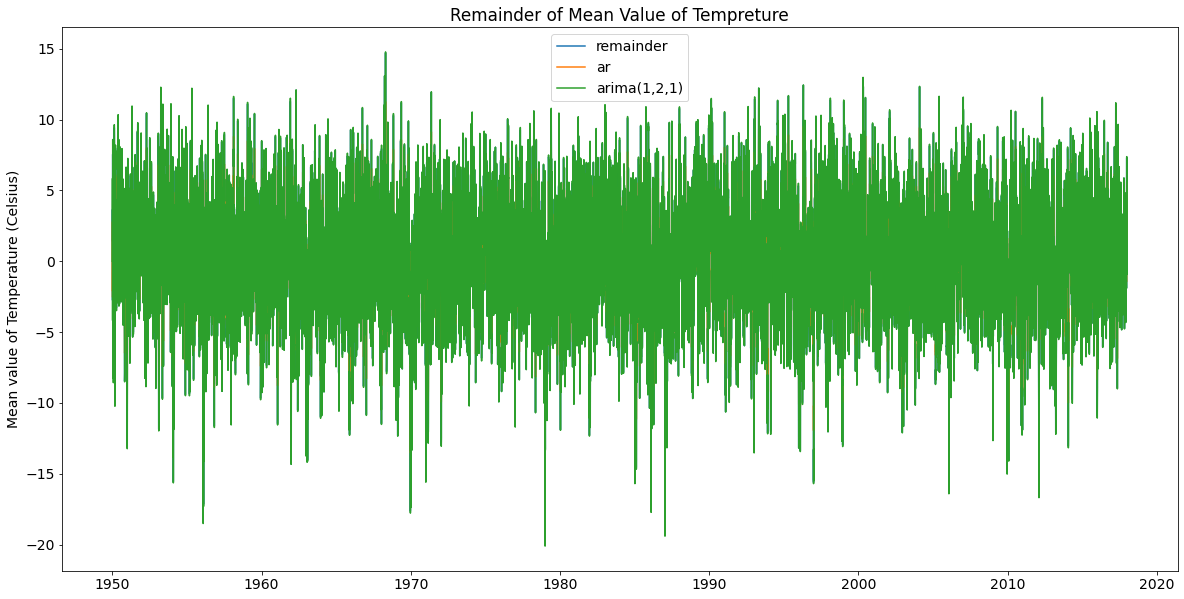

In [228]:
# Plot all time series
plt.rcParams['figure.figsize'] = (20,10)

plt.plot(remainder_tem_mean_train[['remainder']], label='remainder')
plt.plot(remainder_tem_mean_train[['predictions_ar1']], label='ar')
plt.plot(arima_model_mean2.predict(), label='arima(1,2,1)')
plt.title("Remainder of Mean Value of Tempreture")
plt.ylabel("Mean value of Temperature (Celsius)")
plt.legend()
plt.show()

### ARIMA(1,0,1)

In [229]:
# Fit an ARIMA model
arima_model_mean0 = ARIMA(df_arima_mean, order=(1,0,1)).fit() # order is (p,d,q) or (ar,i,ma)
arima_model_mean0.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              remainder   No. Observations:                24836
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -55857.197
Date:                Fri, 26 Aug 2022   AIC                         111722.394
Time:                        14:24:33   BIC                         111754.875
Sample:                    01-02-1950   HQIC                        111732.911
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.067      0.005      0.996      -0.131       0.132
ar.L1          0.7399      0.005    154.243      0.000       0.730       0.749
ma.L1          0.1912      0.007     26.831      0.000       0.177       0.205
sigma2         5.2602      0.041    128.121      0.000       5.180       5.341
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):               608.24
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

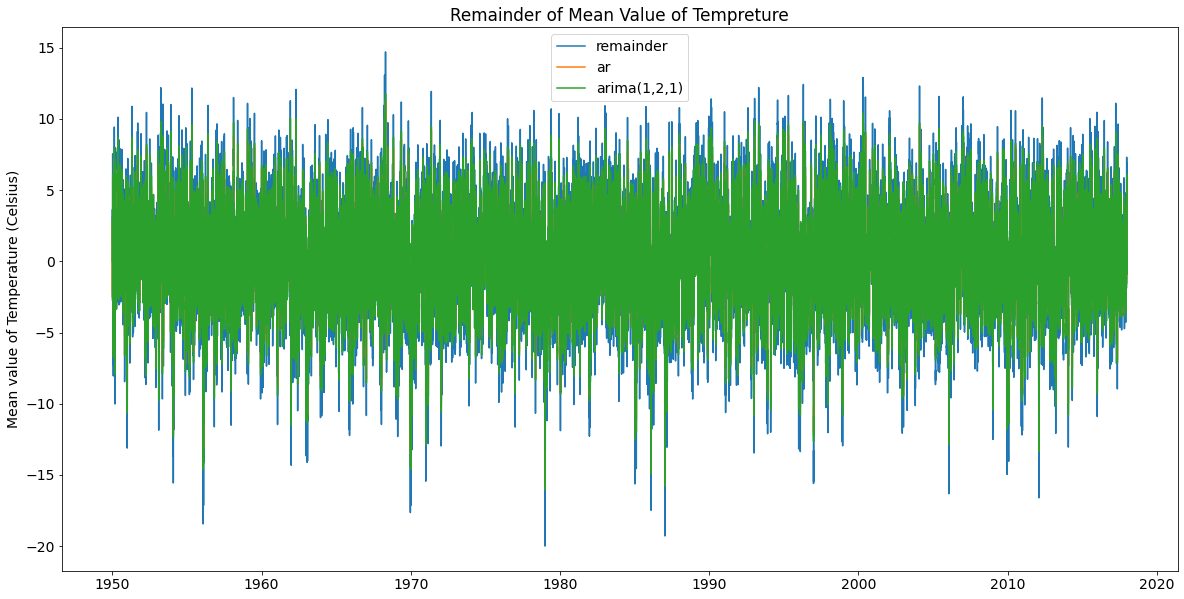

In [230]:
# Plot all time series
plt.rcParams['figure.figsize'] = (20,10)

plt.plot(remainder_tem_mean_train[['remainder']], label='remainder')
plt.plot(remainder_tem_mean_train[['predictions_ar1']], label='ar')
plt.plot(arima_model_mean0.predict(), label='arima(1,2,1)')
plt.title("Remainder of Mean Value of Tempreture")
plt.ylabel("Mean value of Temperature (Celsius)")
plt.legend()
plt.show()

## Min values

## Max values

# Modeling Autoregression with Seasonality, Trend and Remainder

## Checking train data

In [ ]:
df_tem_mean_train.head()

In [ ]:
df_tem_min_train.head()

In [ ]:
df_tem_max_train.head()

## Add the lags of the remainder to the training data

In [231]:
df_tem_mean_train['lag1'] = df_tem_mean_train['remainder'].shift(1)
df_tem_mean_train['lag2'] = df_tem_mean_train['remainder'].shift(2)
df_tem_mean_train['lag3'] = df_tem_mean_train['remainder'].shift(3)
df_tem_mean_train.head()

TG  month  year  timestep      trend  month_2  month_3  month_4  \
DATE                                                                           
1950-01-01 -4.0      1  1950         0  12.860637        0        0        0   
1950-01-02  0.7      1  1950         1  12.860655        0        0        0   
1950-01-03  2.9      1  1950         2  12.860674        0        0        0   
1950-01-04 -0.4      1  1950         3  12.860693        0        0        0   
1950-01-05 -3.5      1  1950         4  12.860712        0        0        0   

            month_5  month_6  ...  month_8  month_9  month_10  month_11  \
DATE                          ...                                         
1950-01-01        0        0  ...        0        0         0         0   
1950-01-02        0        0  ...        0        0         0         0   
1950-01-03        0        0  ...        0        0         0         0   
1950-01-04        0        0  ...        0        0         0         0   
1950-01-05        0        0  ...        0        0         0         0   

            month_12  trend + seasonal  remainder      lag1      lag2  \
DATE                                                                    
1950-01-01         0         -0.750427  -3.249573       NaN       NaN   
1950-01-02         0         -0.750350   1.450350 -3.249573       NaN   
1950-01-03         0         -0.750273   3.650273  1.450350 -3.249573   
1950-01-04         0         -0.750196   0.350196  3.650273  1.450350   
1950-01-05         0         -0.750120  -2.749880  0.350196  3.650273   

                lag3  
DATE                  
1950-01-01       NaN  
1950-01-02       NaN  
1950-01-03       NaN  
1950-01-04 -3.249573  
1950-01-05  1.450350  

[5 rows x 21 columns]

In [232]:
df_tem_mean_train.dropna(inplace=True)

In [233]:
df_tem_min_train['lag1'] = df_tem_min_train['remainder'].shift(1)
df_tem_min_train['lag2'] = df_tem_min_train['remainder'].shift(2)
df_tem_min_train['lag3'] = df_tem_min_train['remainder'].shift(3)
df_tem_min_train['lag4'] = df_tem_min_train['remainder'].shift(4)
df_tem_min_train['lag5'] = df_tem_min_train['remainder'].shift(5)
df_tem_min_train.dropna(inplace=True)
df_tem_min_train.head()

TN  month  year  timestep      trend  month_2  month_3  month_4  \
DATE                                                                           
1950-01-06 -4.9      1  1950         5  12.860730        0        0        0   
1950-01-07  2.1      1  1950         6  12.860749        0        0        0   
1950-01-08  5.2      1  1950         7  12.860768        0        0        0   
1950-01-09  4.0      1  1950         8  12.860786        0        0        0   
1950-01-10 -5.4      1  1950         9  12.860805        0        0        0   

            month_5  month_6  ...  month_10  month_11  month_12  \
DATE                          ...                                 
1950-01-06        0        0  ...         0         0         0   
1950-01-07        0        0  ...         0         0         0   
1950-01-08        0        0  ...         0         0         0   
1950-01-09        0        0  ...         0         0         0   
1950-01-10        0        0  ...         0         0         0   

            trend + seasonal  remainder      lag1      lag2      lag3  \
DATE                                                                    
1950-01-06         -3.071420  -1.828580 -1.128513  1.871554  4.171621   
1950-01-07         -3.071353   5.171353 -1.828580 -1.128513  1.871554   
1950-01-08         -3.071286   8.271286  5.171353 -1.828580 -1.128513   
1950-01-09         -3.071219   7.071219  8.271286  5.171353 -1.828580   
1950-01-10         -3.071152  -2.328848  7.071219  8.271286  5.171353   

                lag4      lag5  
DATE                            
1950-01-06 -1.528312 -2.428245  
1950-01-07  4.171621 -1.528312  
1950-01-08  1.871554  4.171621  
1950-01-09 -1.128513  1.871554  
1950-01-10 -1.828580 -1.128513  

[5 rows x 23 columns]

In [234]:
df_tem_max_train['lag1'] = df_tem_max_train['remainder'].shift(1)
df_tem_max_train['lag2'] = df_tem_max_train['remainder'].shift(2)
df_tem_max_train['lag3'] = df_tem_max_train['remainder'].shift(3)
df_tem_max_train.dropna(inplace=True)
df_tem_max_train.head()

TX  month  year  timestep      trend  month_2  month_3  month_4  \
DATE                                                                           
1950-01-04  2.9      1  1950         3  12.860693        0        0        0   
1950-01-05 -0.4      1  1950         4  12.860712        0        0        0   
1950-01-06  5.2      1  1950         5  12.860730        0        0        0   
1950-01-07  6.5      1  1950         6  12.860749        0        0        0   
1950-01-08  8.9      1  1950         7  12.860768        0        0        0   

            month_5  month_6  ...  month_8  month_9  month_10  month_11  \
DATE                          ...                                         
1950-01-04        0        0  ...        0        0         0         0   
1950-01-05        0        0  ...        0        0         0         0   
1950-01-06        0        0  ...        0        0         0         0   
1950-01-07        0        0  ...        0        0         0         0   
1950-01-08        0        0  ...        0        0         0         0   

            month_12  trend + seasonal  remainder      lag1      lag2  \
DATE                                                                    
1950-01-04         0          1.883363   1.016637  2.416627 -0.283384   
1950-01-05         0          1.883352  -2.283352  1.016637  2.416627   
1950-01-06         0          1.883341   3.316659 -2.283352  1.016637   
1950-01-07         0          1.883331   4.616669  3.316659 -2.283352   
1950-01-08         0          1.883320   7.016680  4.616669  3.316659   

                lag3  
DATE                  
1950-01-04 -3.383394  
1950-01-05 -0.283384  
1950-01-06  2.416627  
1950-01-07  1.016637  
1950-01-08 -2.283352  

[5 rows x 21 columns]

## Run the full model

### Assigning x and y

In [235]:
X_full_train_mean_tem = df_tem_mean_train.drop(columns = ["year", "month", "trend", "TG", "remainder", "trend + seasonal"])
y_full_train_mean_tem = df_tem_mean_train["TG"]
X_full_train_mean_tem.head()

timestep  month_2  month_3  month_4  month_5  month_6  month_7  \
DATE                                                                         
1950-01-04         3        0        0        0        0        0        0   
1950-01-05         4        0        0        0        0        0        0   
1950-01-06         5        0        0        0        0        0        0   
1950-01-07         6        0        0        0        0        0        0   
1950-01-08         7        0        0        0        0        0        0   

            month_8  month_9  month_10  month_11  month_12      lag1  \
DATE                                                                   
1950-01-04        0        0         0         0         0  3.650273   
1950-01-05        0        0         0         0         0  0.350196   
1950-01-06        0        0         0         0         0 -2.749880   
1950-01-07        0        0         0         0         0  2.950043   
1950-01-08        0        0         0         0         0  5.849966   

                lag2      lag3  
DATE                            
1950-01-04  1.450350 -3.249573  
1950-01-05  3.650273  1.450350  
1950-01-06  0.350196  3.650273  
1950-01-07 -2.749880  0.350196  
1950-01-08  2.950043 -2.749880

In [236]:
X_full_train_min_tem = df_tem_min_train.drop(columns = ["year", "month", "trend", "TN", "remainder", "trend + seasonal"])
y_full_train_min_tem = df_tem_min_train["TN"]
X_full_train_min_tem.head()

timestep  month_2  month_3  month_4  month_5  month_6  month_7  \
DATE                                                                         
1950-01-06         5        0        0        0        0        0        0   
1950-01-07         6        0        0        0        0        0        0   
1950-01-08         7        0        0        0        0        0        0   
1950-01-09         8        0        0        0        0        0        0   
1950-01-10         9        0        0        0        0        0        0   

            month_8  month_9  month_10  month_11  month_12      lag1  \
DATE                                                                   
1950-01-06        0        0         0         0         0 -1.128513   
1950-01-07        0        0         0         0         0 -1.828580   
1950-01-08        0        0         0         0         0  5.171353   
1950-01-09        0        0         0         0         0  8.271286   
1950-01-10        0        0         0         0         0  7.071219   

                lag2      lag3      lag4      lag5  
DATE                                                
1950-01-06  1.871554  4.171621 -1.528312 -2.428245  
1950-01-07 -1.128513  1.871554  4.171621 -1.528312  
1950-01-08 -1.828580 -1.128513  1.871554  4.171621  
1950-01-09  5.171353 -1.828580 -1.128513  1.871554  
1950-01-10  8.271286  5.171353 -1.828580 -1.128513

In [237]:
X_full_train_max_tem = df_tem_max_train.drop(columns = ["year", "month", "trend", "TX", "remainder", "trend + seasonal"])
y_full_train_max_tem = df_tem_max_train["TX"]
X_full_train_max_tem.head()

timestep  month_2  month_3  month_4  month_5  month_6  month_7  \
DATE                                                                         
1950-01-04         3        0        0        0        0        0        0   
1950-01-05         4        0        0        0        0        0        0   
1950-01-06         5        0        0        0        0        0        0   
1950-01-07         6        0        0        0        0        0        0   
1950-01-08         7        0        0        0        0        0        0   

            month_8  month_9  month_10  month_11  month_12      lag1  \
DATE                                                                   
1950-01-04        0        0         0         0         0  2.416627   
1950-01-05        0        0         0         0         0  1.016637   
1950-01-06        0        0         0         0         0 -2.283352   
1950-01-07        0        0         0         0         0  3.316659   
1950-01-08        0        0         0         0         0  4.616669   

                lag2      lag3  
DATE                            
1950-01-04 -0.283384 -3.383394  
1950-01-05  2.416627 -0.283384  
1950-01-06  1.016637  2.416627  
1950-01-07 -2.283352  1.016637  
1950-01-08  3.316659 -2.283352

### Fitting the model

In [241]:
m_full_mean = LinearRegression()
m_full_mean.fit(X_full_train_mean_tem, y_full_train_mean_tem)

LinearRegression()

In [242]:
m_full_min = LinearRegression()
m_full_min.fit(X_full_train_min_tem, y_full_train_min_tem)

LinearRegression()

In [243]:
m_full_max = LinearRegression()
m_full_max.fit(X_full_train_max_tem, y_full_train_max_tem)

LinearRegression()

In [244]:
# Create a new predictions column
df_tem_mean_train['predictions_full_model'] = m_full_mean.predict(X_full_train_mean_tem)
df_tem_min_train['predictions_full_model'] = m_full_min.predict(X_full_train_min_tem)
df_tem_max_train['predictions_full_model'] = m_full_max.predict(X_full_train_max_tem)

### Plot the prediction vs tempreture for the training data

Text(0.5, 0, 'Year')

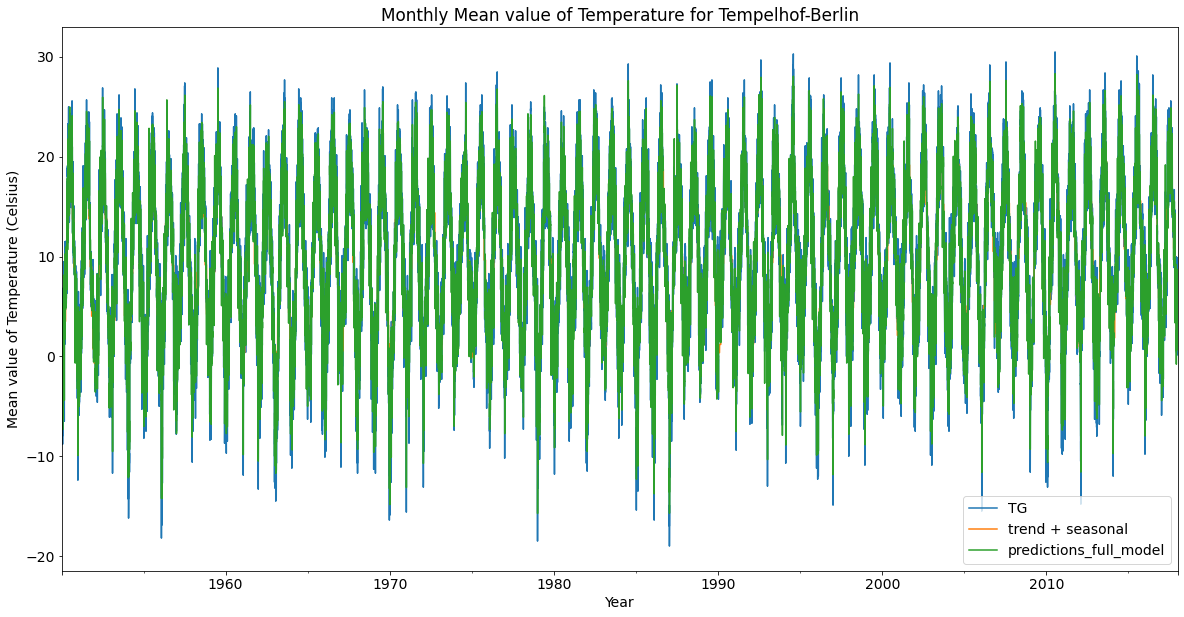

In [245]:
df_tem_mean_train[['TG', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Mean value of Temperature for Tempelhof-Berlin')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

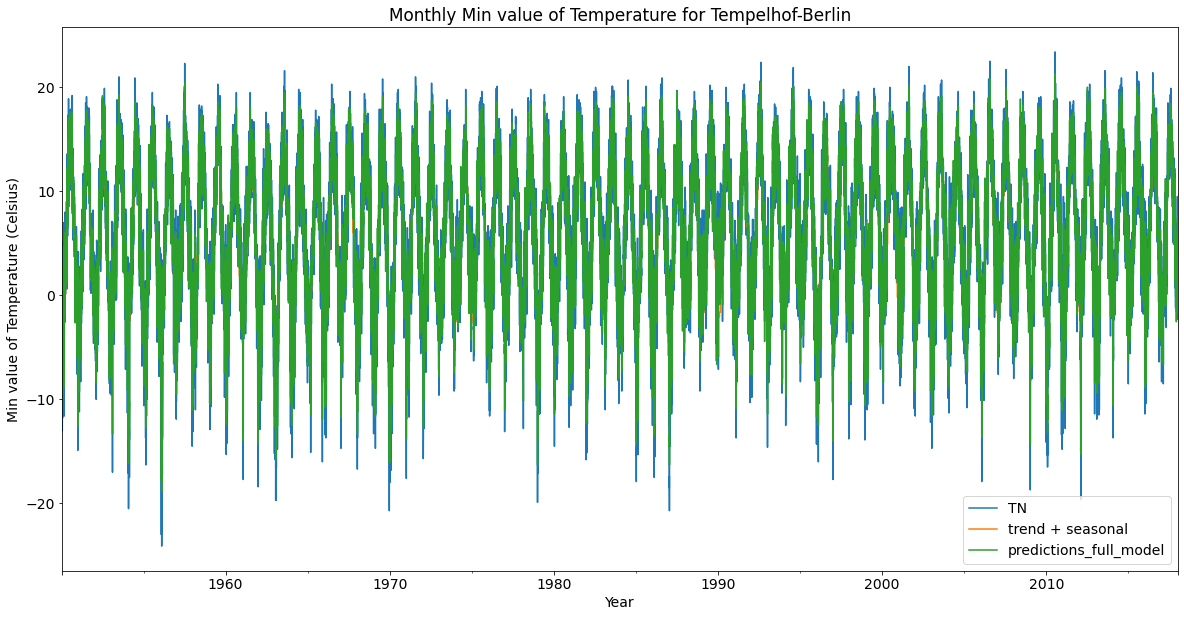

In [246]:
df_tem_min_train[['TN', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Min value of Temperature for Tempelhof-Berlin')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

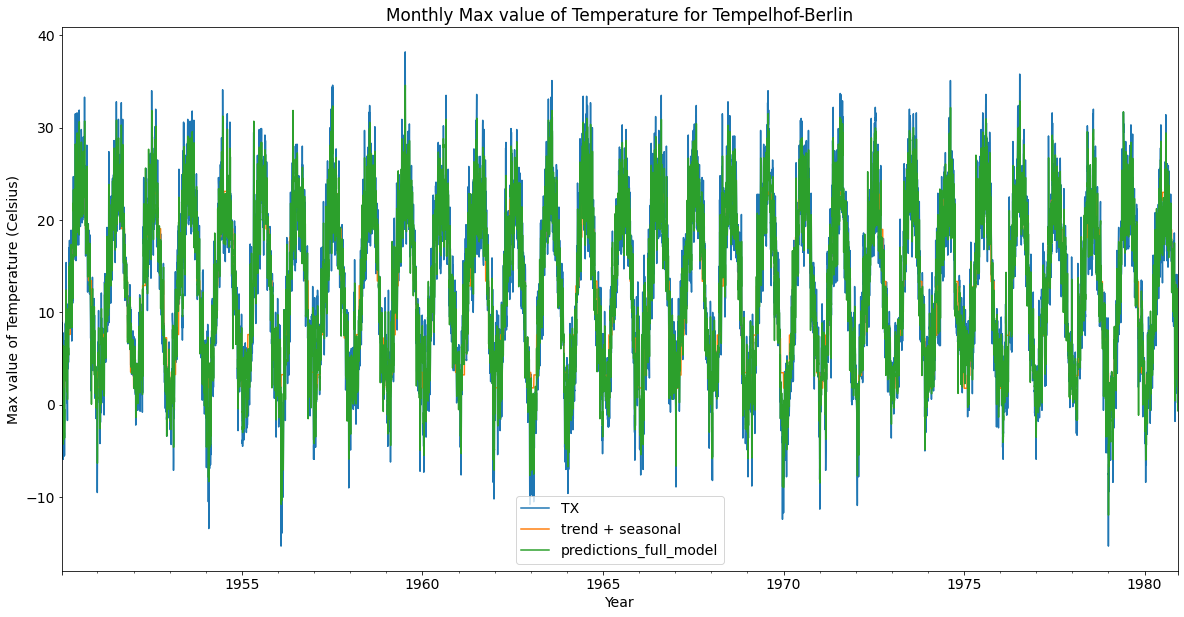

In [247]:
df_tem_max_train[['TX', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Max value of Temperature for Tempelhof-Berlin')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Year')

## Evaluating the model for train data

In [248]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from statsmodels.tsa.ar_model import AutoReg

In [249]:
# Create a TimeSeriesSplit object
ts_split = TimeSeriesSplit(n_splits=5)

### Mean values

In [250]:
# Create the time series split
time_series_split_mean = ts_split.split(X_full_train_mean_tem, y_full_train_mean_tem)

In [251]:
# Do the cross validation: Remember these are the 'test scores' in the training data.
result_mean = cross_val_score(estimator=m_full_mean, 
                         X=X_full_train_mean_tem, y=y_full_train_mean_tem,
                         cv=time_series_split_mean)
result_mean

array([0.91569472, 0.91142201, 0.90318278, 0.92118553, 0.91911914])

In [252]:
result_mean.mean()

0.9141208363841994

### Min values

In [253]:
# Create the time series split
time_series_split_min = ts_split.split(X_full_train_min_tem, y_full_train_min_tem)

In [254]:
# Do the cross validation: Remember these are the 'test scores' in the training data.
result_min = cross_val_score(estimator=m_full_min, 
                         X=X_full_train_min_tem, y=y_full_train_min_tem,
                         cv=time_series_split_min)
result_min

array([0.88017681, 0.86629784, 0.8689783 , 0.88340632, 0.87576223])

In [255]:
result_min.mean()

0.8749243014797496

### Max values

In [256]:
# Create the time series split
time_series_split_max = ts_split.split(X_full_train_max_tem, y_full_train_max_tem)

In [257]:
# Do the cross validation: Remember these are the 'test scores' in the training data.
result_max = cross_val_score(estimator=m_full_max, 
                         X=X_full_train_max_tem, y=y_full_train_max_tem,
                         cv=time_series_split_max)
result_max

array([0.88968016, 0.89400421, 0.9063441 , 0.88894802, 0.89948185])

In [258]:
result_max.mean()

0.8956916672037301

## Testing the model

### checking the test data

In [ ]:
df_tem_mean_test.head()

In [ ]:
df_tem_min_test.head()

In [ ]:
df_tem_max_test1.head()

In [ ]:
df_tem_max_test2.head()

### Extracting month

In [259]:
df_tem_mean_test["month"] = df_tem_mean_test.index.month
df_tem_mean_test["year"] = df_tem_mean_test.index.year
# df_tem_mean_test = round(df_tem_mean_test.groupby(["year","month"], as_index=False).mean(), 2)
df_tem_mean_test.head(20)

/tmp/ipykernel_194085/4060512983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_mean_test["month"] = df_tem_mean_test.index.month
/tmp/ipykernel_194085/4060512983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_mean_test["year"] = df_tem_mean_test.index.year


TG  month  year
DATE                        
2018-01-01  8.5      1  2018
2018-01-02  4.6      1  2018
2018-01-03  5.1      1  2018
2018-01-04  6.8      1  2018
2018-01-05  7.1      1  2018
2018-01-06  5.3      1  2018
2018-01-07  1.2      1  2018
2018-01-08 -1.8      1  2018
2018-01-09  1.9      1  2018
2018-01-10  2.4      1  2018
2018-01-11  2.7      1  2018
2018-01-12  1.6      1  2018
2018-01-13  0.3      1  2018
2018-01-14 -1.7      1  2018
2018-01-15  0.3      1  2018
2018-01-16  2.9      1  2018
2018-01-17  1.5      1  2018
2018-01-18  2.6      1  2018
2018-01-19  2.6      1  2018
2018-01-20  1.3      1  2018

In [260]:
df_tem_min_test["month"] = df_tem_min_test.index.month
df_tem_min_test["year"] = df_tem_min_test.index.year
# df_tem_min_test = round(df_tem_min_test.groupby(["year","month"], as_index=False).mean(), 2)
df_tem_min_test.head(20)

/tmp/ipykernel_194085/3325931850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_min_test["month"] = df_tem_min_test.index.month
/tmp/ipykernel_194085/3325931850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_min_test["year"] = df_tem_min_test.index.year


TN  month  year
DATE                        
2018-01-01  4.1      1  2018
2018-01-02  2.5      1  2018
2018-01-03  2.1      1  2018
2018-01-04  5.8      1  2018
2018-01-05  4.2      1  2018
2018-01-06  3.4      1  2018
2018-01-07 -2.2      1  2018
2018-01-08 -5.0      1  2018
2018-01-09 -2.5      1  2018
2018-01-10  1.4      1  2018
2018-01-11  1.5      1  2018
2018-01-12  0.8      1  2018
2018-01-13 -0.3      1  2018
2018-01-14 -3.1      1  2018
2018-01-15 -2.6      1  2018
2018-01-16  0.5      1  2018
2018-01-17  0.4      1  2018
2018-01-18  0.6      1  2018
2018-01-19  1.4      1  2018
2018-01-20 -1.6      1  2018

In [261]:
df_tem_max_test1["month"] = df_tem_max_test1.index.month
df_tem_max_test1["year"] = df_tem_max_test1.index.year
# df_tem_max_test1 = round(df_tem_max_test1.groupby(["year","month"], as_index=False).mean(), 2)
df_tem_max_test1.head(20)

/tmp/ipykernel_194085/2453015313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_test1["month"] = df_tem_max_test1.index.month
/tmp/ipykernel_194085/2453015313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_test1["year"] = df_tem_max_test1.index.year


TX  month  year
DATE                        
1981-01-01  6.4      1  1981
1981-01-02  4.0      1  1981
1981-01-03  8.6      1  1981
1981-01-04  4.8      1  1981
1981-01-05  0.8      1  1981
1981-01-06 -0.6      1  1981
1981-01-07 -3.4      1  1981
1981-01-08 -6.0      1  1981
1981-01-09  0.6      1  1981
1981-01-10  1.1      1  1981
1981-01-11  1.3      1  1981
1981-01-12 -1.0      1  1981
1981-01-13  1.2      1  1981
1981-01-14 -0.5      1  1981
1981-01-15  2.5      1  1981
1981-01-16  1.0      1  1981
1981-01-17  2.7      1  1981
1981-01-18  2.1      1  1981
1981-01-19  1.5      1  1981
1981-01-20  1.3      1  1981

In [262]:
df_tem_max_test2["month"] = df_tem_max_test2.index.month
df_tem_max_test2["year"] = df_tem_max_test2.index.year
# df_tem_max_test2 = round(df_tem_max_test2.groupby(["year","month"], as_index=False).mean(), 2)
df_tem_max_test2.head(20)

/tmp/ipykernel_194085/3486412216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_test2["month"] = df_tem_max_test2.index.month
/tmp/ipykernel_194085/3486412216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_test2["year"] = df_tem_max_test2.index.year


TX  month  year
DATE                        
2009-01-01 -0.8      1  2009
2009-01-02 -0.3      1  2009
2009-01-03  0.3      1  2009
2009-01-04  1.0      1  2009
2009-01-05  0.0      1  2009
2009-01-06 -6.8      1  2009
2009-01-07 -3.5      1  2009
2009-01-08 -5.7      1  2009
2009-01-09 -1.2      1  2009
2009-01-10 -0.3      1  2009
2009-01-11 -2.1      1  2009
2009-01-12 -1.0      1  2009
2009-01-13  2.2      1  2009
2009-01-14 -1.2      1  2009
2009-01-15  2.4      1  2009
2009-01-16  1.1      1  2009
2009-01-17  2.5      1  2009
2009-01-18  5.0      1  2009
2009-01-19  5.1      1  2009
2009-01-20  5.9      1  2009

### Getting last timestep of the training data and creating a timestep column

In [263]:
last_train_timestep_mean_tem = df_tem_mean_train['timestep'][-1]
last_train_timestep_min_tem = df_tem_min_train['timestep'][-1]
last_train_timestep_max_tem = df_tem_max_train['timestep'][-1]

In [264]:
df_tem_mean_test['timestep'] = list(range(last_train_timestep_mean_tem + 1, 
                            last_train_timestep_mean_tem + len(df_tem_mean_test) + 1))
df_tem_mean_test.head()

/tmp/ipykernel_194085/4097117551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_mean_test['timestep'] = list(range(last_train_timestep_mean_tem + 1,


TG  month  year  timestep
DATE                                  
2018-01-01  8.5      1  2018     24837
2018-01-02  4.6      1  2018     24838
2018-01-03  5.1      1  2018     24839
2018-01-04  6.8      1  2018     24840
2018-01-05  7.1      1  2018     24841

In [265]:
df_tem_min_test['timestep'] = list(range(last_train_timestep_min_tem + 1, 
                            last_train_timestep_min_tem + len(df_tem_min_test) + 1))
df_tem_min_test.head()

/tmp/ipykernel_194085/2292999813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_min_test['timestep'] = list(range(last_train_timestep_min_tem + 1,


TN  month  year  timestep
DATE                                  
2018-01-01  4.1      1  2018     24837
2018-01-02  2.5      1  2018     24838
2018-01-03  2.1      1  2018     24839
2018-01-04  5.8      1  2018     24840
2018-01-05  4.2      1  2018     24841

In [266]:
df_tem_max_test1['timestep'] = list(range(last_train_timestep_max_tem + 1, 
                            last_train_timestep_max_tem + len(df_tem_max_test1) + 1))
df_tem_max_test1.head()

/tmp/ipykernel_194085/2468090536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_test1['timestep'] = list(range(last_train_timestep_max_tem + 1,


TX  month  year  timestep
DATE                                  
1981-01-01  6.4      1  1981     11293
1981-01-02  4.0      1  1981     11294
1981-01-03  8.6      1  1981     11295
1981-01-04  4.8      1  1981     11296
1981-01-05  0.8      1  1981     11297

### Getting the trend - seasonal component of the test data

#### One hot encoding the month

In [267]:
seasonal_dummies_tem_mean_test = pd.get_dummies(df_tem_mean_test.index.month, 
                                  prefix='month', 
                                  drop_first=True).set_index(df_tem_mean_test.index)

df_tem_mean_test = df_tem_mean_test.join(seasonal_dummies_tem_mean_test)
df_tem_mean_test.head()

TG  month  year  timestep  month_2  month_3  month_4  month_5  \
DATE                                                                         
2018-01-01  8.5      1  2018     24837        0        0        0        0   
2018-01-02  4.6      1  2018     24838        0        0        0        0   
2018-01-03  5.1      1  2018     24839        0        0        0        0   
2018-01-04  6.8      1  2018     24840        0        0        0        0   
2018-01-05  7.1      1  2018     24841        0        0        0        0   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  
DATE                                                                          
2018-01-01        0        0        0        0         0         0         0  
2018-01-02        0        0        0        0         0         0         0  
2018-01-03        0        0        0        0         0         0         0  
2018-01-04        0        0        0        0         0         0         0  
2018-01-05        0        0        0        0         0         0         0

In [268]:
seasonal_dummies_tem_min_test = pd.get_dummies(df_tem_min_test.index.month, 
                                  prefix='month', 
                                  drop_first=True).set_index(df_tem_min_test.index)

df_tem_min_test = df_tem_min_test.join(seasonal_dummies_tem_min_test)
df_tem_min_test.head()

TN  month  year  timestep  month_2  month_3  month_4  month_5  \
DATE                                                                         
2018-01-01  4.1      1  2018     24837        0        0        0        0   
2018-01-02  2.5      1  2018     24838        0        0        0        0   
2018-01-03  2.1      1  2018     24839        0        0        0        0   
2018-01-04  5.8      1  2018     24840        0        0        0        0   
2018-01-05  4.2      1  2018     24841        0        0        0        0   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  
DATE                                                                          
2018-01-01        0        0        0        0         0         0         0  
2018-01-02        0        0        0        0         0         0         0  
2018-01-03        0        0        0        0         0         0         0  
2018-01-04        0        0        0        0         0         0         0  
2018-01-05        0        0        0        0         0         0         0

In [269]:
seasonal_dummies_tem_max_test1 = pd.get_dummies(df_tem_max_test1.index.month, 
                                  prefix='month', 
                                  drop_first=True).set_index(df_tem_max_test1.index)

df_tem_max_test1 = df_tem_max_test1.join(seasonal_dummies_tem_max_test1)
df_tem_max_test1.head()

TX  month  year  timestep  month_2  month_3  month_4  month_5  \
DATE                                                                         
1981-01-01  6.4      1  1981     11293        0        0        0        0   
1981-01-02  4.0      1  1981     11294        0        0        0        0   
1981-01-03  8.6      1  1981     11295        0        0        0        0   
1981-01-04  4.8      1  1981     11296        0        0        0        0   
1981-01-05  0.8      1  1981     11297        0        0        0        0   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  
DATE                                                                          
1981-01-01        0        0        0        0         0         0         0  
1981-01-02        0        0        0        0         0         0         0  
1981-01-03        0        0        0        0         0         0         0  
1981-01-04        0        0        0        0         0         0         0  
1981-01-05        0        0        0        0         0         0         0

#### Predicting the trend-seasonal column using the linearregression model (>> important : without fitting (test data)<<)

In [270]:
X_temp_mean_test = df_tem_mean_test.drop(columns=['TG', 'month', 'year'])
df_tem_mean_test['trend + seasonal'] = m_se_tr.predict(X_temp_mean_test)
df_tem_mean_test.head()

TG  month  year  timestep  month_2  month_3  month_4  month_5  \
DATE                                                                         
2018-01-01  8.5      1  2018     24837        0        0        0        0   
2018-01-02  4.6      1  2018     24838        0        0        0        0   
2018-01-03  5.1      1  2018     24839        0        0        0        0   
2018-01-04  6.8      1  2018     24840        0        0        0        0   
2018-01-05  7.1      1  2018     24841        0        0        0        0   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
DATE                                                                           
2018-01-01        0        0        0        0         0         0         0   
2018-01-02        0        0        0        0         0         0         0   
2018-01-03        0        0        0        0         0         0         0   
2018-01-04        0        0        0        0         0         0         0   
2018-01-05        0        0        0        0         0         0         0   

            trend + seasonal  
DATE                          
2018-01-01          1.621625  
2018-01-02          1.621614  
2018-01-03          1.621604  
2018-01-04          1.621593  
2018-01-05          1.621583

In [271]:
X_temp_min_test = df_tem_min_test.drop(columns=['TN', 'month', 'year'])
df_tem_min_test['trend + seasonal'] = m_se_tr.predict(X_temp_min_test)
df_tem_min_test.head()

TN  month  year  timestep  month_2  month_3  month_4  month_5  \
DATE                                                                         
2018-01-01  4.1      1  2018     24837        0        0        0        0   
2018-01-02  2.5      1  2018     24838        0        0        0        0   
2018-01-03  2.1      1  2018     24839        0        0        0        0   
2018-01-04  5.8      1  2018     24840        0        0        0        0   
2018-01-05  4.2      1  2018     24841        0        0        0        0   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
DATE                                                                           
2018-01-01        0        0        0        0         0         0         0   
2018-01-02        0        0        0        0         0         0         0   
2018-01-03        0        0        0        0         0         0         0   
2018-01-04        0        0        0        0         0         0         0   
2018-01-05        0        0        0        0         0         0         0   

            trend + seasonal  
DATE                          
2018-01-01          1.621625  
2018-01-02          1.621614  
2018-01-03          1.621604  
2018-01-04          1.621593  
2018-01-05          1.621583

In [272]:
X_temp_max_test1 = df_tem_max_test1.drop(columns=['TX', 'month', 'year'])
df_tem_max_test1['trend + seasonal'] = m_se_tr.predict(X_temp_max_test1)
df_tem_max_test1.head()

TX  month  year  timestep  month_2  month_3  month_4  month_5  \
DATE                                                                         
1981-01-01  6.4      1  1981     11293        0        0        0        0   
1981-01-02  4.0      1  1981     11294        0        0        0        0   
1981-01-03  8.6      1  1981     11295        0        0        0        0   
1981-01-04  4.8      1  1981     11296        0        0        0        0   
1981-01-05  0.8      1  1981     11297        0        0        0        0   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
DATE                                                                           
1981-01-01        0        0        0        0         0         0         0   
1981-01-02        0        0        0        0         0         0         0   
1981-01-03        0        0        0        0         0         0         0   
1981-01-04        0        0        0        0         0         0         0   
1981-01-05        0        0        0        0         0         0         0   

            trend + seasonal  
DATE                          
1981-01-01          1.764372  
1981-01-02          1.764361  
1981-01-03          1.764351  
1981-01-04          1.764340  
1981-01-05          1.764330

#### Plotting the results

(-5.0, 40.0)

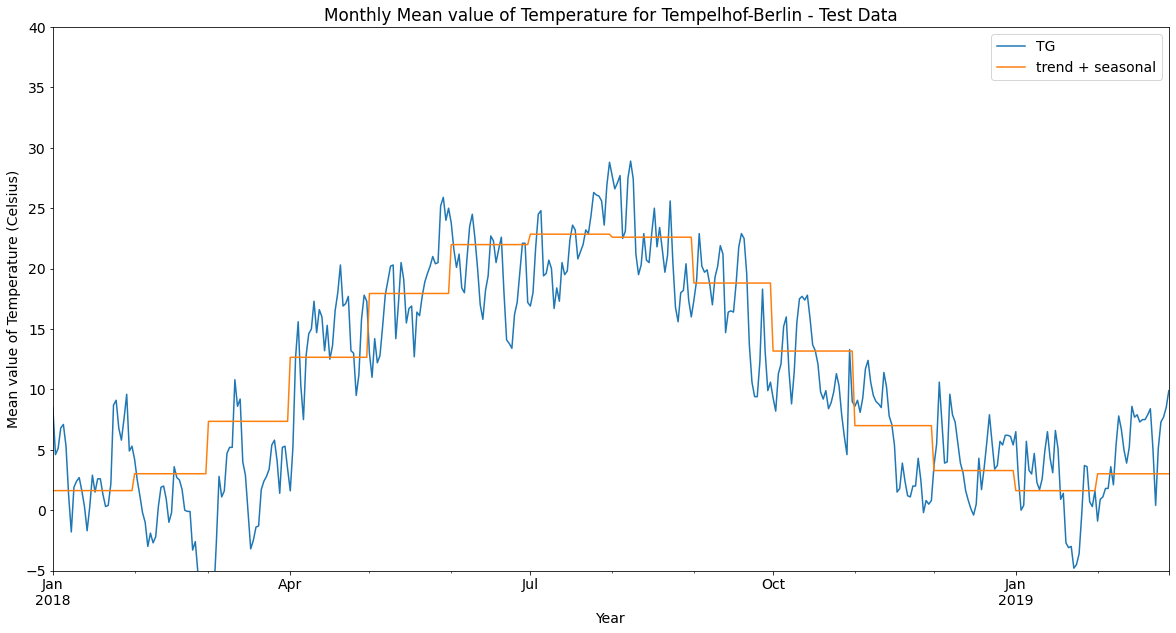

In [273]:
df_tem_mean_test[['TG', 'trend + seasonal']].plot()
plt.title('Monthly Mean value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Year')
plt.ylim(-5,40)

(-5.0, 40.0)

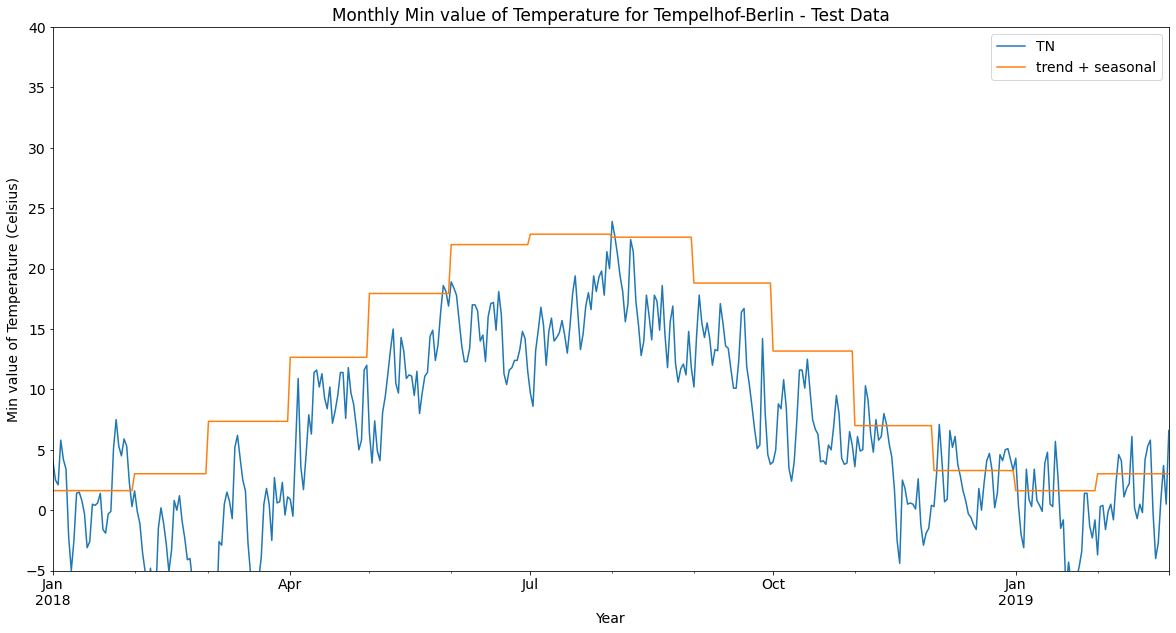

In [274]:
df_tem_min_test[['TN', 'trend + seasonal']].plot()
plt.title('Monthly Min value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Year')
plt.ylim(-5,40)

(-5.0, 40.0)

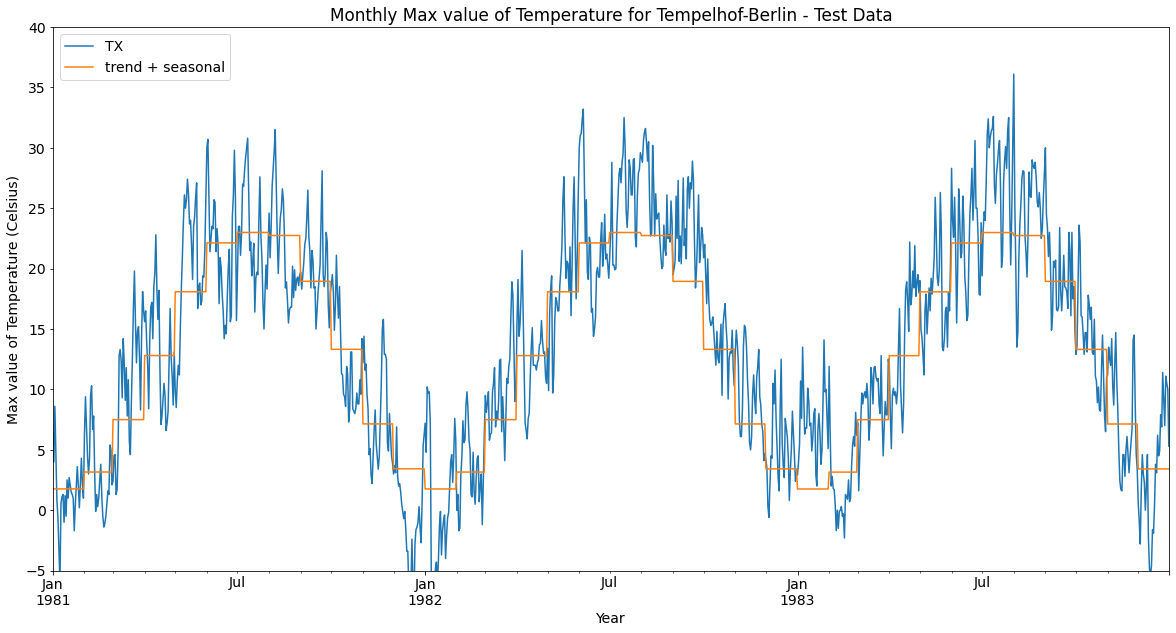

In [275]:
df_tem_max_test1[['TX', 'trend + seasonal']].plot()
plt.title('Monthly Max value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Year')
plt.ylim(-5,40)

### Calculating the remainder and adding the lag1 for the test data

In [279]:
df_tem_mean_test['remainder'] = df_tem_mean_test['TG'] - df_tem_mean_test['trend + seasonal']
df_tem_mean_test['lag1'] = df_tem_mean_test['remainder'].shift(1)
df_tem_mean_test['lag2'] = df_tem_mean_test['remainder'].shift(2)
df_tem_mean_test['lag3'] = df_tem_mean_test['remainder'].shift(3)
df_tem_mean_test.head()

TG  month  year  timestep  month_2  month_3  month_4  month_5  \
DATE                                                                         
2018-01-01  8.5      1  2018     24837        0        0        0        0   
2018-01-02  4.6      1  2018     24838        0        0        0        0   
2018-01-03  5.1      1  2018     24839        0        0        0        0   
2018-01-04  6.8      1  2018     24840        0        0        0        0   
2018-01-05  7.1      1  2018     24841        0        0        0        0   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
DATE                                                                           
2018-01-01        0        0        0        0         0         0         0   
2018-01-02        0        0        0        0         0         0         0   
2018-01-03        0        0        0        0         0         0         0   
2018-01-04        0        0        0        0         0         0         0   
2018-01-05        0        0        0        0         0         0         0   

            trend + seasonal  remainder      lag1      lag2      lag3  
DATE                                                                   
2018-01-01          1.621625   6.878375       NaN       NaN       NaN  
2018-01-02          1.621614   2.978386  6.878375       NaN       NaN  
2018-01-03          1.621604   3.478396  2.978386  6.878375       NaN  
2018-01-04          1.621593   5.178407  3.478396  2.978386  6.878375  
2018-01-05          1.621583   5.478417  5.178407  3.478396  2.978386

In [278]:
df_tem_mean_train.tail(1)

TG  month  year  timestep      trend  month_2  month_3  month_4  \
DATE                                                                           
2017-12-31  9.5     12  2017     24836  13.325542        0        0        0   

            month_5  month_6  ...  month_9  month_10  month_11  month_12  \
DATE                          ...                                          
2017-12-31        0        0  ...        0         0         0         1   

            trend + seasonal  remainder      lag1      lag2      lag3  \
DATE                                                                    
2017-12-31          2.589203   6.910797  0.110874 -0.889049  0.511027   

            predictions_full_model  
DATE                                
2017-12-31                2.928249  

[1 rows x 22 columns]

In [280]:
# df_tem_mean_test.loc['2018-01-01', 'lag1'] = df_tem_mean_train.loc['2017-12-31', 'remainder']
# df_tem_mean_test.loc['2018-01-02', 'lag1'] = df_tem_mean_train.loc['2018-01-01', 'remainder']
# df_tem_mean_test.loc['2018-01-03', 'lag1'] = df_tem_mean_train.loc['2018-01-02', 'remainder']
df_tem_mean_test.dropna(inplace = True)
df_tem_mean_test.head()

TG  month  year  timestep  month_2  month_3  month_4  month_5  \
DATE                                                                         
2018-01-04  6.8      1  2018     24840        0        0        0        0   
2018-01-05  7.1      1  2018     24841        0        0        0        0   
2018-01-06  5.3      1  2018     24842        0        0        0        0   
2018-01-07  1.2      1  2018     24843        0        0        0        0   
2018-01-08 -1.8      1  2018     24844        0        0        0        0   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
DATE                                                                           
2018-01-04        0        0        0        0         0         0         0   
2018-01-05        0        0        0        0         0         0         0   
2018-01-06        0        0        0        0         0         0         0   
2018-01-07        0        0        0        0         0         0         0   
2018-01-08        0        0        0        0         0         0         0   

            trend + seasonal  remainder      lag1      lag2      lag3  
DATE                                                                   
2018-01-04          1.621593   5.178407  3.478396  2.978386  6.878375  
2018-01-05          1.621583   5.478417  5.178407  3.478396  2.978386  
2018-01-06          1.621572   3.678428  5.478417  5.178407  3.478396  
2018-01-07          1.621562  -0.421562  3.678428  5.478417  5.178407  
2018-01-08          1.621551  -3.421551 -0.421562  3.678428  5.478417

In [286]:
df_tem_min_test['remainder'] = df_tem_min_test['TN'] - df_tem_min_test['trend + seasonal']
df_tem_min_test['lag1'] = df_tem_min_test['remainder'].shift(1)
df_tem_min_test['lag2'] = df_tem_min_test['remainder'].shift(2)
df_tem_min_test['lag3'] = df_tem_min_test['remainder'].shift(3)
df_tem_min_test['lag4'] = df_tem_min_test['remainder'].shift(4)
df_tem_min_test['lag5'] = df_tem_min_test['remainder'].shift(5)
df_tem_min_test.dropna(inplace = True)
df_tem_min_test.head()

TN  month  year  timestep  month_2  month_3  month_4  month_5  \
DATE                                                                         
2018-01-06  3.4      1  2018     24842        0        0        0        0   
2018-01-07 -2.2      1  2018     24843        0        0        0        0   
2018-01-08 -5.0      1  2018     24844        0        0        0        0   
2018-01-09 -2.5      1  2018     24845        0        0        0        0   
2018-01-10  1.4      1  2018     24846        0        0        0        0   

            month_6  month_7  ...  month_10  month_11  month_12  \
DATE                          ...                                 
2018-01-06        0        0  ...         0         0         0   
2018-01-07        0        0  ...         0         0         0   
2018-01-08        0        0  ...         0         0         0   
2018-01-09        0        0  ...         0         0         0   
2018-01-10        0        0  ...         0         0         0   

            trend + seasonal  remainder      lag1      lag2      lag3  \
DATE                                                                    
2018-01-06          1.621572   1.778428  2.578417  4.178407  0.478396   
2018-01-07          1.621562  -3.821562  1.778428  2.578417  4.178407   
2018-01-08          1.621551  -6.621551 -3.821562  1.778428  2.578417   
2018-01-09          1.621541  -4.121541 -6.621551 -3.821562  1.778428   
2018-01-10          1.621530  -0.221530 -4.121541 -6.621551 -3.821562   

                lag4      lag5  
DATE                            
2018-01-06  0.878386  2.478375  
2018-01-07  0.478396  0.878386  
2018-01-08  4.178407  0.478396  
2018-01-09  2.578417  4.178407  
2018-01-10  1.778428  2.578417  

[5 rows x 22 columns]

In [281]:
df_tem_max_test1['remainder'] = df_tem_max_test1['TX'] - df_tem_max_test1['trend + seasonal']

df_tem_max_test1['lag1'] = df_tem_max_test1['remainder'].shift(1)
df_tem_max_test1['lag2'] = df_tem_max_test1['remainder'].shift(2)
df_tem_max_test1['lag3'] = df_tem_max_test1['remainder'].shift(3)
df_tem_max_test1.dropna(inplace = True)
df_tem_max_test1.head()

TX  month  year  timestep  month_2  month_3  month_4  month_5  \
DATE                                                                         
1981-01-04  4.8      1  1981     11296        0        0        0        0   
1981-01-05  0.8      1  1981     11297        0        0        0        0   
1981-01-06 -0.6      1  1981     11298        0        0        0        0   
1981-01-07 -3.4      1  1981     11299        0        0        0        0   
1981-01-08 -6.0      1  1981     11300        0        0        0        0   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
DATE                                                                           
1981-01-04        0        0        0        0         0         0         0   
1981-01-05        0        0        0        0         0         0         0   
1981-01-06        0        0        0        0         0         0         0   
1981-01-07        0        0        0        0         0         0         0   
1981-01-08        0        0        0        0         0         0         0   

            trend + seasonal  remainder      lag1      lag2      lag3  
DATE                                                                   
1981-01-04          1.764340   3.035660  6.835649  2.235639  4.635628  
1981-01-05          1.764330  -0.964330  3.035660  6.835649  2.235639  
1981-01-06          1.764319  -2.364319 -0.964330  3.035660  6.835649  
1981-01-07          1.764308  -5.164308 -2.364319 -0.964330  3.035660  
1981-01-08          1.764298  -7.764298 -5.164308 -2.364319 -0.964330

### Predicting the tempreture using the linearregression model (>> important : without fitting (test data)<<)

In [283]:
# Assign X_full and make prediction

X_full_test_mean_tem = df_tem_mean_test.drop(columns=['TG','month', 'year', 'trend + seasonal', 'remainder'])
df_tem_mean_test['predictions_full_model'] = m_full_mean.predict(X_full_test_mean_tem)

In [287]:
X_full_test_min_tem = df_tem_min_test.drop(columns=['TN','month', 'year', 'trend + seasonal', 'remainder'])
df_tem_min_test['predictions_full_model'] = m_full_min.predict(X_full_test_min_tem)

In [292]:
# X_full_test_max_tem = df_tem_max_test1.drop(columns=['TX','month', 'year', 'trend + seasonal', 'remainder'])
df_tem_max_test1['predictions_full_model'] = m_full_max.predict(X_full_test_max_tem)

### Plotting the results

Text(0.5, 0, 'Year')

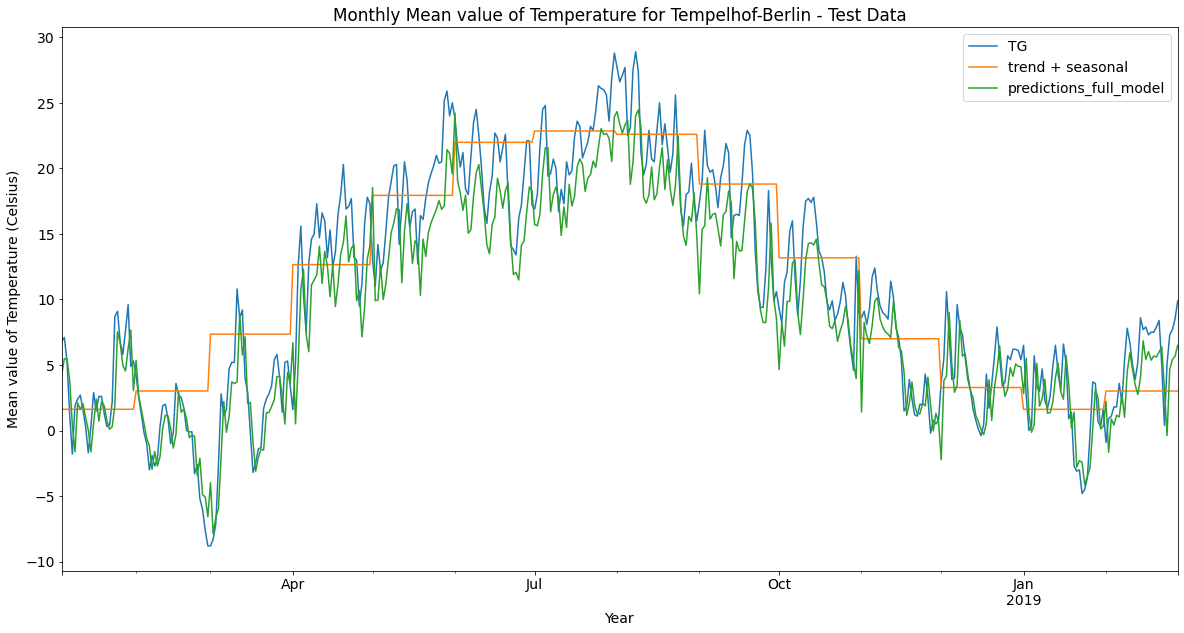

In [293]:
df_tem_mean_test[['TG', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Mean value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

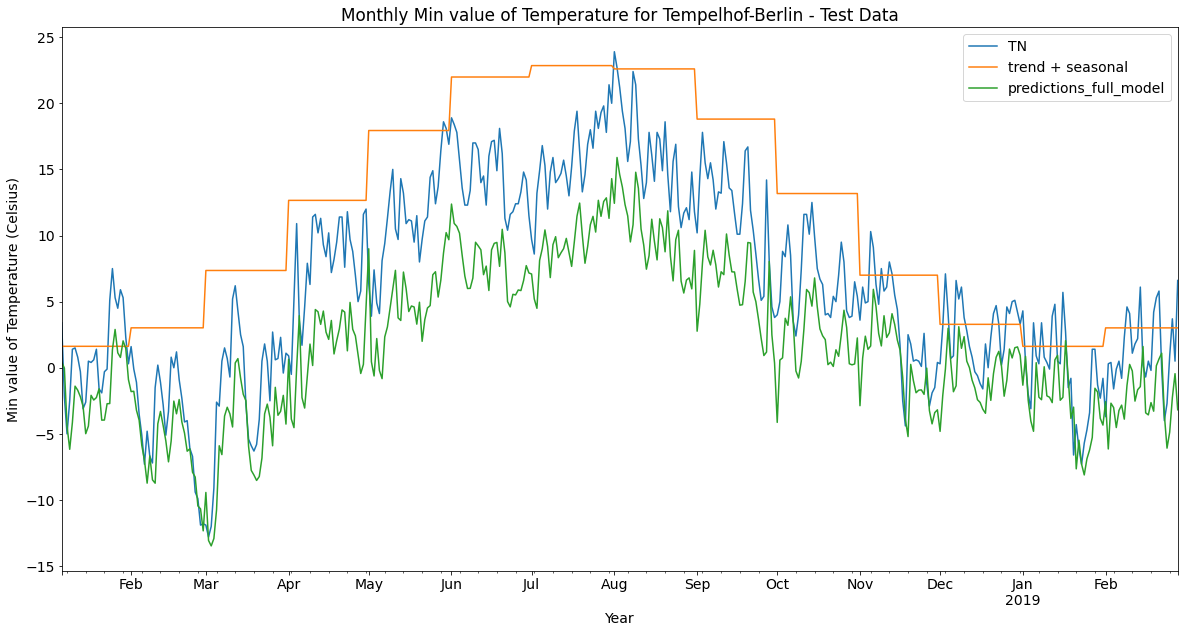

In [294]:
df_tem_min_test[['TN', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Min value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

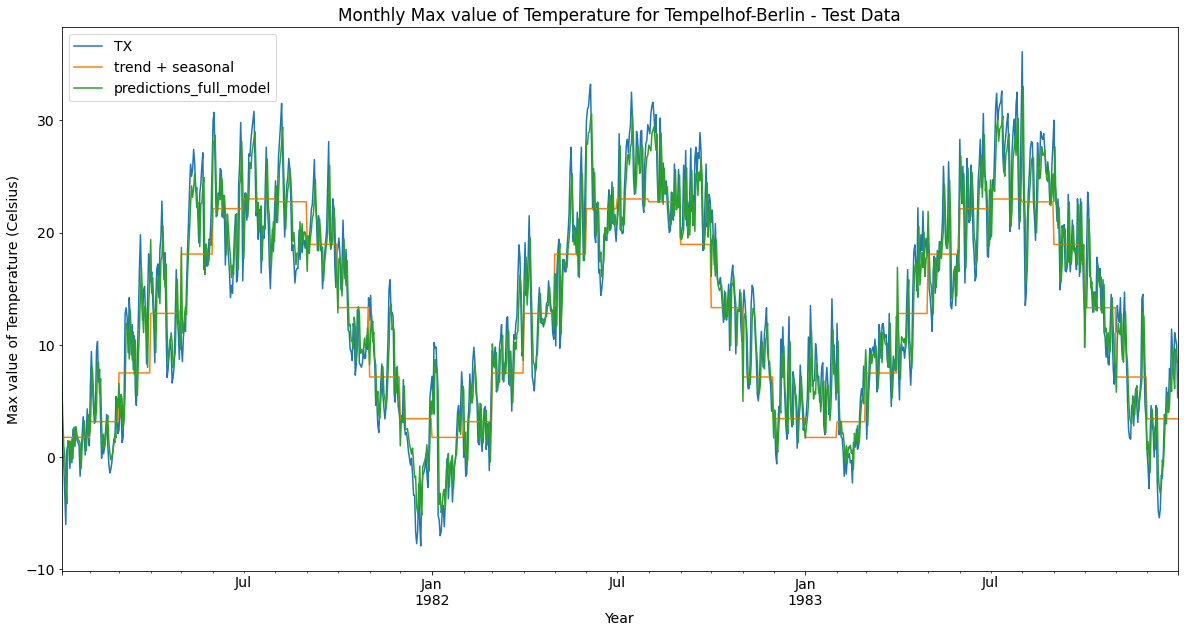

In [295]:
df_tem_max_test1[['TX', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Max value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Year')

#### Plotting the full data (train + test) and predictions

/tmp/ipykernel_194085/175702744.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tem_mean_full = df_tem_mean_train[['TG', 'trend + seasonal', 'predictions_full_model']].append(df_tem_mean_test[['TG', 'trend + seasonal', 'predictions_full_model']])


Text(0.5, 0, 'Year')

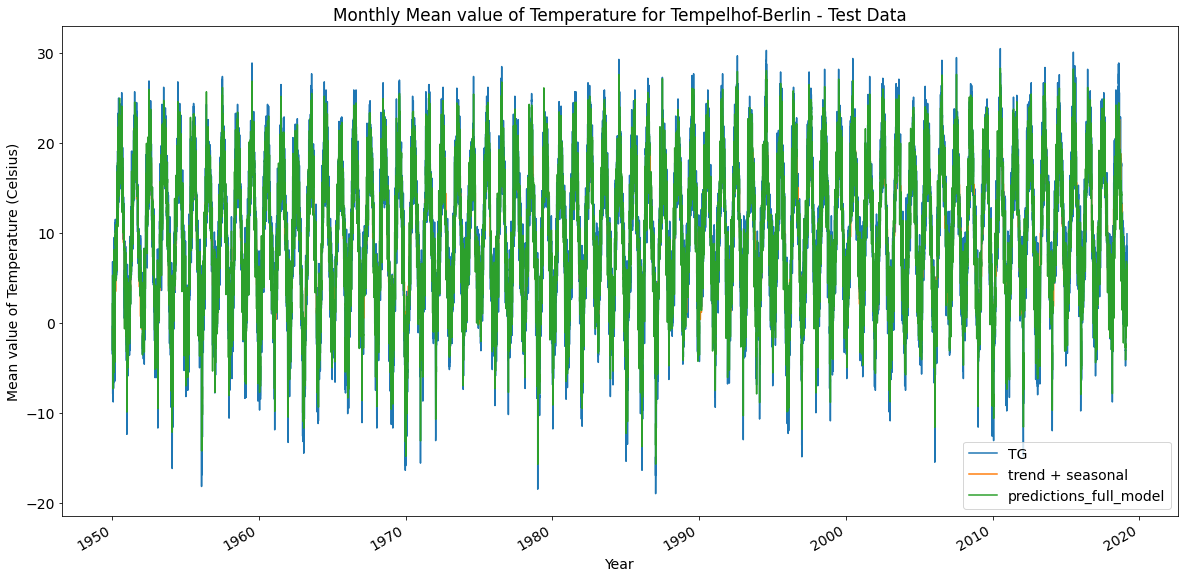

In [296]:
# Create the complete dataset and plot it
df_tem_mean_full = df_tem_mean_train[['TG', 'trend + seasonal', 'predictions_full_model']].append(df_tem_mean_test[['TG', 'trend + seasonal', 'predictions_full_model']])
df_tem_mean_full[['TG', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Mean value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Year')

/tmp/ipykernel_194085/2263347840.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tem_min_full = df_tem_min_train[['TN', 'trend + seasonal', 'predictions_full_model']].append(df_tem_min_test[['TN', 'trend + seasonal', 'predictions_full_model']])


Text(0.5, 0, 'Year')

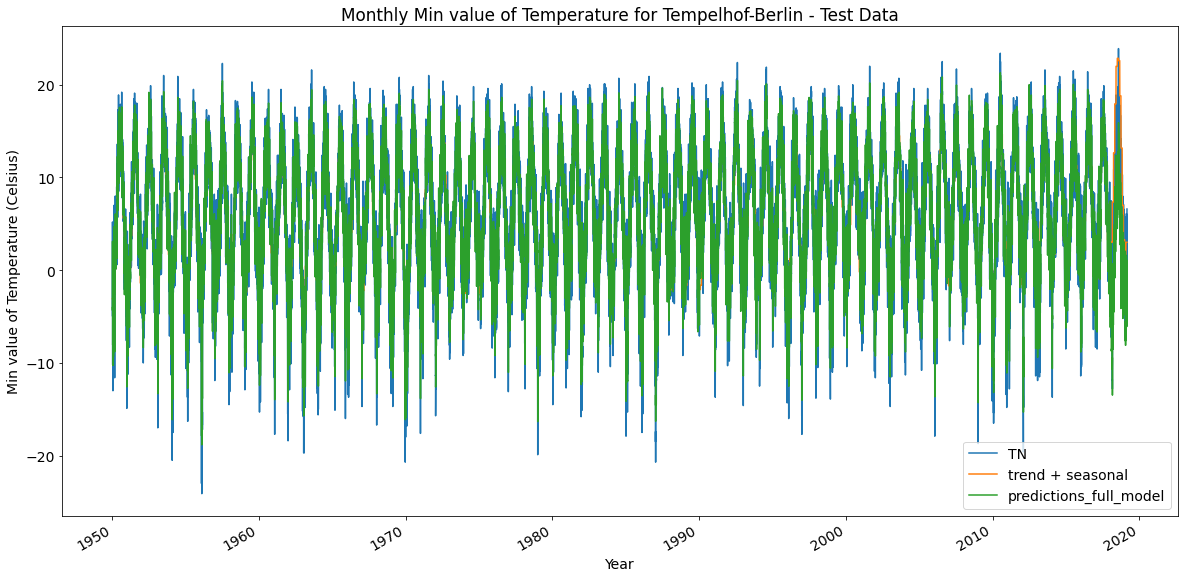

In [297]:
# Create the complete dataset and plot it
df_tem_min_full = df_tem_min_train[['TN', 'trend + seasonal', 'predictions_full_model']].append(df_tem_min_test[['TN', 'trend + seasonal', 'predictions_full_model']])
df_tem_min_full[['TN', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Min value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Year')

/tmp/ipykernel_194085/3011469232.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tem_max_full = df_tem_max_train[['TX', 'trend + seasonal', 'predictions_full_model']].append(df_tem_max_test1[['TX', 'trend + seasonal', 'predictions_full_model']])


Text(0.5, 0, 'Year')

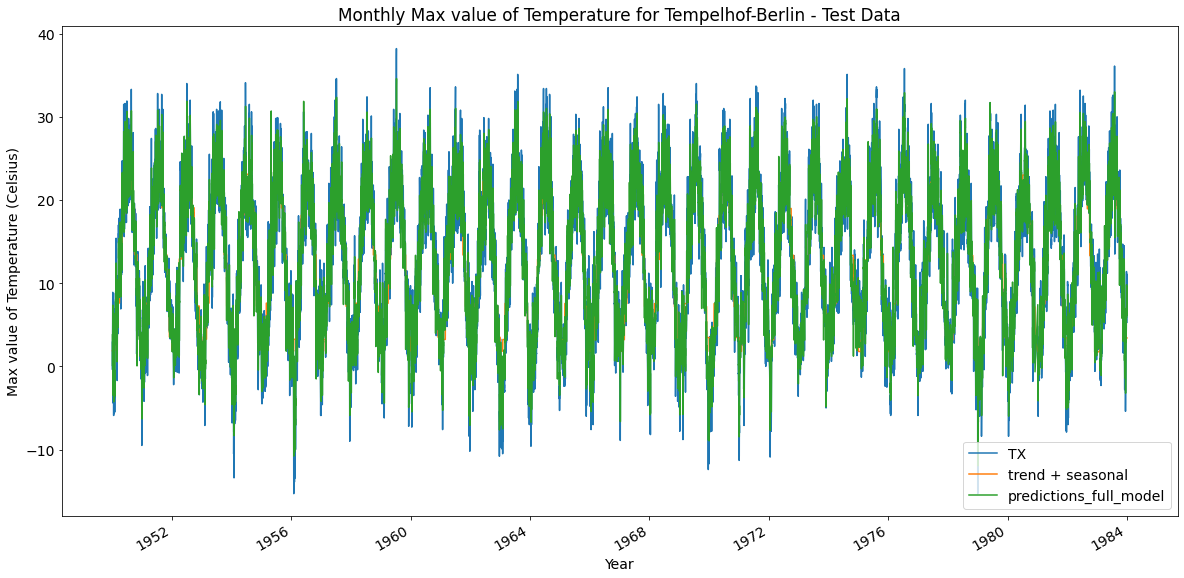

In [298]:
# Create the complete dataset and plot it
df_tem_max_full = df_tem_max_train[['TX', 'trend + seasonal', 'predictions_full_model']].append(df_tem_max_test1[['TX', 'trend + seasonal', 'predictions_full_model']])
df_tem_max_full[['TX', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Max value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Year')

# Predicting the future

## Combining test-train data and fitting the model

In [299]:
# Combine train and test data
df_tem_mean_combined = df_tem_mean_train.append(df_tem_mean_test)
df_tem_mean_combined.head()

/tmp/ipykernel_194085/2168436587.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tem_mean_combined = df_tem_mean_train.append(df_tem_mean_test)


TG  month  year  timestep      trend  month_2  month_3  month_4  \
DATE                                                                           
1950-01-04 -0.4      1  1950         3  12.860693        0        0        0   
1950-01-05 -3.5      1  1950         4  12.860712        0        0        0   
1950-01-06  2.2      1  1950         5  12.860730        0        0        0   
1950-01-07  5.1      1  1950         6  12.860749        0        0        0   
1950-01-08  6.8      1  1950         7  12.860768        0        0        0   

            month_5  month_6  ...  month_9  month_10  month_11  month_12  \
DATE                          ...                                          
1950-01-04        0        0  ...        0         0         0         0   
1950-01-05        0        0  ...        0         0         0         0   
1950-01-06        0        0  ...        0         0         0         0   
1950-01-07        0        0  ...        0         0         0         0   
1950-01-08        0        0  ...        0         0         0         0   

            trend + seasonal  remainder      lag1      lag2      lag3  \
DATE                                                                    
1950-01-04         -0.750196   0.350196  3.650273  1.450350 -3.249573   
1950-01-05         -0.750120  -2.749880  0.350196  3.650273  1.450350   
1950-01-06         -0.750043   2.950043 -2.749880  0.350196  3.650273   
1950-01-07         -0.749966   5.849966  2.950043 -2.749880  0.350196   
1950-01-08         -0.749890   7.549890  5.849966  2.950043 -2.749880   

            predictions_full_model  
DATE                                
1950-01-04                2.128183  
1950-01-05               -1.033455  
1950-01-06               -3.077543  
1950-01-07                2.588476  
1950-01-08                3.897403  

[5 rows x 22 columns]

In [300]:
# Combine train and test data
df_tem_min_combined = df_tem_min_train.append(df_tem_min_test)
df_tem_min_combined.head()

/tmp/ipykernel_194085/2807613525.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tem_min_combined = df_tem_min_train.append(df_tem_min_test)


TN  month  year  timestep      trend  month_2  month_3  month_4  \
DATE                                                                           
1950-01-06 -4.9      1  1950         5  12.860730        0        0        0   
1950-01-07  2.1      1  1950         6  12.860749        0        0        0   
1950-01-08  5.2      1  1950         7  12.860768        0        0        0   
1950-01-09  4.0      1  1950         8  12.860786        0        0        0   
1950-01-10 -5.4      1  1950         9  12.860805        0        0        0   

            month_5  month_6  ...  month_11  month_12  trend + seasonal  \
DATE                          ...                                         
1950-01-06        0        0  ...         0         0         -3.071420   
1950-01-07        0        0  ...         0         0         -3.071353   
1950-01-08        0        0  ...         0         0         -3.071286   
1950-01-09        0        0  ...         0         0         -3.071219   
1950-01-10        0        0  ...         0         0         -3.071152   

            remainder      lag1      lag2      lag3      lag4      lag5  \
DATE                                                                      
1950-01-06  -1.828580 -1.128513  1.871554  4.171621 -1.528312 -2.428245   
1950-01-07   5.171353 -1.828580 -1.128513  1.871554  4.171621 -1.528312   
1950-01-08   8.271286  5.171353 -1.828580 -1.128513  1.871554  4.171621   
1950-01-09   7.071219  8.271286  5.171353 -1.828580 -1.128513  1.871554   
1950-01-10  -2.328848  7.071219  8.271286  5.171353 -1.828580 -1.128513   

            predictions_full_model  
DATE                                
1950-01-06               -4.035445  
1950-01-07               -4.336312  
1950-01-08                1.285035  
1950-01-09                3.115375  
1950-01-10                2.026029  

[5 rows x 24 columns]

In [301]:
# Combine train and test data
df_tem_max_combined = df_tem_max_train.append(df_tem_max_test1)
df_tem_max_combined.head()

/tmp/ipykernel_194085/2231367195.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tem_max_combined = df_tem_max_train.append(df_tem_max_test1)


TX  month  year  timestep      trend  month_2  month_3  month_4  \
DATE                                                                           
1950-01-04  2.9      1  1950         3  12.860693        0        0        0   
1950-01-05 -0.4      1  1950         4  12.860712        0        0        0   
1950-01-06  5.2      1  1950         5  12.860730        0        0        0   
1950-01-07  6.5      1  1950         6  12.860749        0        0        0   
1950-01-08  8.9      1  1950         7  12.860768        0        0        0   

            month_5  month_6  ...  month_9  month_10  month_11  month_12  \
DATE                          ...                                          
1950-01-04        0        0  ...        0         0         0         0   
1950-01-05        0        0  ...        0         0         0         0   
1950-01-06        0        0  ...        0         0         0         0   
1950-01-07        0        0  ...        0         0         0         0   
1950-01-08        0        0  ...        0         0         0         0   

            trend + seasonal  remainder      lag1      lag2      lag3  \
DATE                                                                    
1950-01-04          1.883363   1.016637  2.416627 -0.283384 -3.383394   
1950-01-05          1.883352  -2.283352  1.016637  2.416627 -0.283384   
1950-01-06          1.883341   3.316659 -2.283352  1.016637  2.416627   
1950-01-07          1.883331   4.616669  3.316659 -2.283352  1.016637   
1950-01-08          1.883320   7.016680  4.616669  3.316659 -2.283352   

            predictions_full_model  
DATE                                
1950-01-04                3.788690  
1950-01-05                2.475890  
1950-01-06                0.035584  
1950-01-07                4.965476  
1950-01-08                5.253364  

[5 rows x 22 columns]

In [302]:
# Re-train the model on the whole dataset - Mean
X_tem_mean_combined = df_tem_mean_combined.drop(columns=['TG','year','month', 'trend', 'trend + seasonal', 'remainder', 'predictions_full_model'])
y_tem_mean_combined = df_tem_mean_combined['TG']

In [303]:
# Re-train the model on the whole dataset - Min
X_tem_min_combined = df_tem_min_combined.drop(columns=['TN','year','month', 'trend', 'trend + seasonal', 'remainder', 'predictions_full_model'])
y_tem_min_combined = df_tem_min_combined['TN']

In [304]:
# Re-train the model on the whole dataset - Max
X_tem_max_combined = df_tem_max_combined.drop(columns=['TX','year','month', 'trend', 'trend + seasonal', 'remainder', 'predictions_full_model'])
y_tem_max_combined = df_tem_max_combined['TX']

In [305]:
m_combined_mean = LinearRegression()
m_combined_min = LinearRegression()
m_combined_max = LinearRegression()
m_combined_mean.fit(X_tem_mean_combined, y_tem_mean_combined)
m_combined_min.fit(X_tem_min_combined, y_tem_min_combined)
m_combined_max.fit(X_tem_max_combined, y_tem_max_combined)

LinearRegression()

## creating a single future step data and predicting the tempreture

### Mean values

In [306]:
# What is the first date in the future? 2019-03-01
df_tem_mean_combined.tail(1)

TG  month  year  timestep  trend  month_2  month_3  month_4  \
DATE                                                                       
2019-02-28  9.9      2  2019     25260    NaN        1        0        0   

            month_5  month_6  ...  month_9  month_10  month_11  month_12  \
DATE                          ...                                          
2019-02-28        0        0  ...        0         0         0         0   

            trend + seasonal  remainder      lag1     lag2     lag3  \
DATE                                                                  
2019-02-28          3.014508   6.885492  5.485481  4.68547  4.28546   

            predictions_full_model  
DATE                                
2019-02-28                6.494231  

[1 rows x 22 columns]

In [323]:
timestep_mean = df_tem_mean_combined['timestep'].max() + 1
months_mean = [0] * 11
lag1_mean = df_tem_mean_combined.loc['2019-02-28', 'remainder']
lag2_mean = df_tem_mean_combined.loc['2019-02-27', 'remainder']
lag3_mean = df_tem_mean_combined.loc['2019-02-26', 'remainder']

In [324]:
timestep_mean, months_mean, lag1_mean, lag2_mean, lag3_mean

(25261,
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 6.885491559463759,
 5.485481019976994,
 4.685470480490229)

In [325]:
X_future_mean = [timestep_mean]

X_future_mean

[25261]

In [326]:
X_future_mean.extend(months_mean)
X_future_mean.append(lag1_mean)
X_future_mean.append(lag2_mean)
X_future_mean.append(lag3_mean)
X_future_mean

[25261,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6.885491559463759,
 5.485481019976994,
 4.685470480490229]

In [327]:
X_future_mean = pd.DataFrame([X_future_mean])
X_future_mean.columns = X_tem_mean_combined.columns

X_future_mean

timestep  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0     25261        0        0        0        0        0        0        0   

   month_9  month_10  month_11  month_12      lag1      lag2     lag3  
0        0         0         0         0  6.885492  5.485481  4.68547

In [328]:
m_combined_mean.predict(X_future_mean)

array([6.90913631])

### Min values

In [322]:
# What is the first date in the future? 2019-03-01
df_tem_min_combined.tail(1)

TN  month  year  timestep  trend  month_2  month_3  month_4  \
DATE                                                                       
2019-02-28  6.6      2  2019     25260    NaN        1        0        0   

            month_5  month_6  ...  month_11  month_12  trend + seasonal  \
DATE                          ...                                         
2019-02-28        0        0  ...         0         0          3.014508   

            remainder      lag1     lag2     lag3      lag4      lag5  \
DATE                                                                    
2019-02-28   3.585492 -2.514519  0.68547 -2.11454 -5.714551 -7.014561   

            predictions_full_model  
DATE                                
2019-02-28               -3.176461  

[1 rows x 24 columns]

In [329]:
timestep_min = df_tem_min_combined['timestep'].max() + 1
months_min = [0] * 11
lag1_min = df_tem_min_combined.loc['2019-02-28', 'remainder']
lag2_min = df_tem_min_combined.loc['2019-02-27', 'remainder']
lag3_min = df_tem_min_combined.loc['2019-02-26', 'remainder']
lag4_min = df_tem_min_combined.loc['2019-02-25', 'remainder']
lag5_min = df_tem_min_combined.loc['2019-02-24', 'remainder']

In [330]:
timestep_min, months_min, lag1_min, lag2_min, lag3_min, lag4_min, lag5_min

(25261,
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 3.5854915594637586,
 -2.5145189800230057,
 0.6854704804902294,
 -2.1145400589965355,
 -5.7145505984833)

In [331]:
X_future_min = [timestep_min]

X_future_min

[25261]

In [332]:
X_future_min.extend(months_min)
X_future_min.append(lag1_min)
X_future_min.append(lag2_min)
X_future_min.append(lag3_min)
X_future_min.append(lag4_min)
X_future_min.append(lag5_min)
X_future_min

[25261,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3.5854915594637586,
 -2.5145189800230057,
 0.6854704804902294,
 -2.1145400589965355,
 -5.7145505984833]

In [333]:
X_future_min = pd.DataFrame([X_future_min])
X_future_min.columns = X_tem_min_combined.columns

X_future_min

timestep  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0     25261        0        0        0        0        0        0        0   

   month_9  month_10  month_11  month_12      lag1      lag2     lag3  \
0        0         0         0         0  3.585492 -2.514519  0.68547   

      lag4      lag5  
0 -2.11454 -5.714551

In [334]:
m_combined_min.predict(X_future_min)

array([1.89912772])

### Max values

In [335]:
# What is the first date in the future? 1984-01-01
df_tem_max_combined.tail(1)

TX  month  year  timestep  trend  month_2  month_3  month_4  \
DATE                                                                       
1983-12-31  5.3     12  1983     12387    NaN        0        0        0   

            month_5  month_6  ...  month_9  month_10  month_11  month_12  \
DATE                          ...                                          
1983-12-31        0        0  ...        0         0         0         1   

            trend + seasonal  remainder      lag1     lag2     lag3  \
DATE                                                                  
1983-12-31          3.417409   1.882591  6.582581  7.08257  7.68256   

            predictions_full_model  
DATE                                
1983-12-31                8.413935  

[1 rows x 22 columns]

In [336]:
timestep_max = df_tem_max_combined['timestep'].max() + 1
months_max = [0] * 11
lag1_max = df_tem_max_combined.loc['1983-12-31', 'remainder']
lag2_max = df_tem_max_combined.loc['1983-12-30', 'remainder']
lag3_max = df_tem_max_combined.loc['1983-12-29', 'remainder']

In [337]:
timestep_max, months_max, lag1_max, lag2_max, lag3_max

(12388,
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1.882591265363693,
 6.582580725876928,
 7.082570186390163)

In [338]:
X_future_max = [timestep_max]

X_future_max

[12388]

In [339]:
X_future_max.extend(months_max)
X_future_max.append(lag1_max)
X_future_max.append(lag2_max)
X_future_max.append(lag3_max)
X_future_max

[12388,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.882591265363693,
 6.582580725876928,
 7.082570186390163]

In [340]:
X_future_max = pd.DataFrame([X_future_max])
X_future_max.columns = X_tem_max_combined.columns

X_future_max

timestep  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0     12388        0        0        0        0        0        0        0   

   month_9  month_10  month_11  month_12      lag1      lag2     lag3  
0        0         0         0         0  1.882591  6.582581  7.08257

In [341]:
m_combined_max.predict(X_future_max)

array([3.00215085])

# Augmented Dickey-Fuller Test on the Remainder

In [342]:
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa import stattools

In [343]:
def print_adf(data):
    
    """ Prints the results of the augmented Dickey Fuller Test"""
    
    adf_stats, p, used_lag, n_obs, levels, information_criterion = \
            statsmodels.tsa.stattools.adfuller(data)
    
    print(f"""   
            adf: {round(adf_stats,2)}
            p: {p} 
            used lag: {used_lag} 
            number of observations: {n_obs}
            {round(levels['1%'],2)} (p=0.01; CI=99%) 
            {round(levels['5%'],2)} (p=0.05; CI=95%)
            {round(levels['10%'],2)} (p=0.1 CI=90%) 
            information criterion (AIC): {information_criterion}
            """)

## Mean values

In [344]:
df_mean= pd.read_csv('df_tem_mean_train_remainder.csv', index_col=0, parse_dates=True)
df_mean.head()

remainder
DATE                 
1950-01-01  -3.249573
1950-01-02   1.450350
1950-01-03   3.650273
1950-01-04   0.350196
1950-01-05  -2.749880

Text(0.5, 1.0, 'Remainder for Mean Values of the Tempreture')

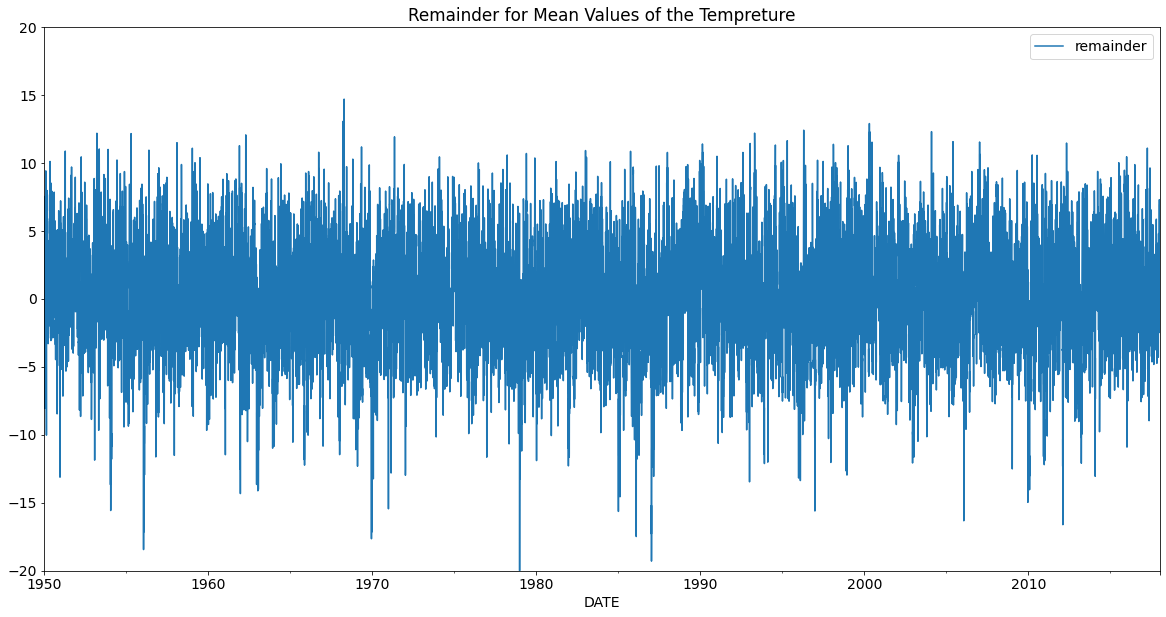

In [345]:
df_mean.plot()
plt.ylim(-20, 20)
plt.title("Remainder for Mean Values of the Tempreture")

In [346]:
print_adf(df_mean)

   
            adf: -22.6
            p: 0.0 
            used lag: 31 
            number of observations: 24805
            -3.43 (p=0.01; CI=99%) 
            -2.86 (p=0.05; CI=95%)
            -2.57 (p=0.1 CI=90%) 
            information criterion (AIC): 111400.26435869669
            


* adf is out of the confidential level 99% and p is 0. So, the remainder for mean value is stationary. (rules: if adf is smaller than CI=99% and p<= 0.05 data is stationary)

## Min values

In [347]:
df_min= pd.read_csv('df_tem_min_train_remainder.csv', index_col=0, parse_dates=True)
df_min.head()

remainder
DATE                 
1950-01-01  -2.428245
1950-01-02  -1.528312
1950-01-03   4.171621
1950-01-04   1.871554
1950-01-05  -1.128513

Text(0.5, 1.0, 'Remainder for Min Values of the Tempreture')

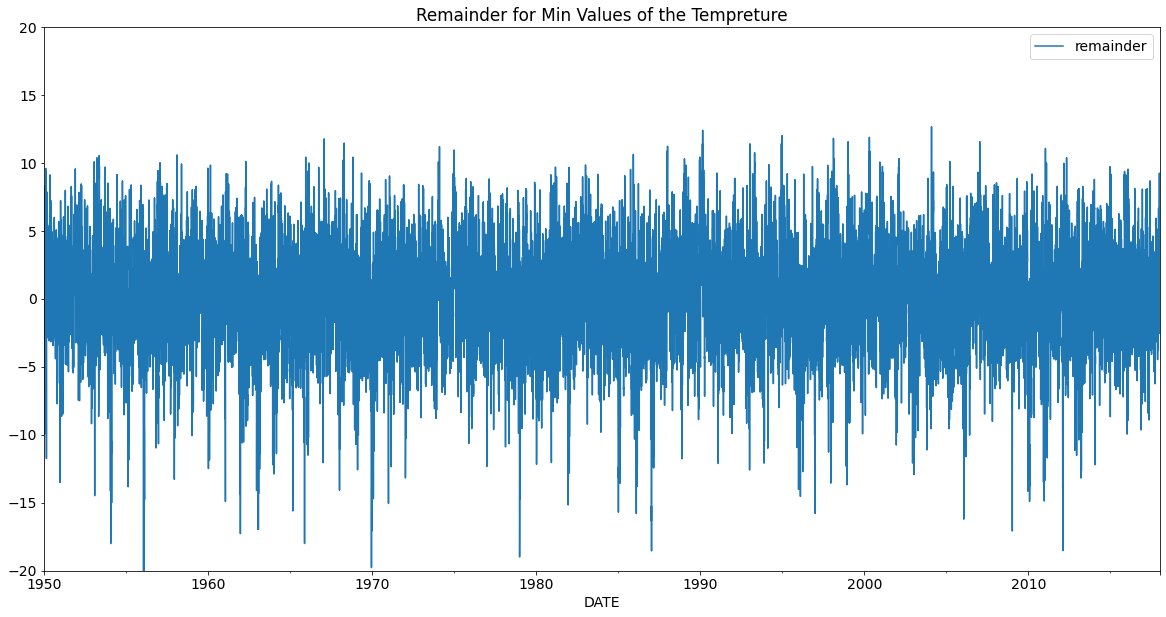

In [348]:
df_min.plot()
plt.ylim(-20, 20)
plt.title("Remainder for Min Values of the Tempreture")

In [349]:
print_adf(df_min)

   
            adf: -38.73
            p: 0.0 
            used lag: 7 
            number of observations: 24829
            -3.43 (p=0.01; CI=99%) 
            -2.86 (p=0.05; CI=95%)
            -2.57 (p=0.1 CI=90%) 
            information criterion (AIC): 115052.48019793622
            


* adf is out of the confidential level 99% and p is 0. So, the remainder for min value is stationary.

## Max values

In [350]:
df_max= pd.read_csv('df_tem_max_train_remainder.csv', index_col=0, parse_dates=True)
df_max.head()

remainder
DATE                 
1950-01-01  -3.383394
1950-01-02  -0.283384
1950-01-03   2.416627
1950-01-04   1.016637
1950-01-05  -2.283352

Text(0.5, 1.0, 'Remainder for Max Values of the Tempreture')

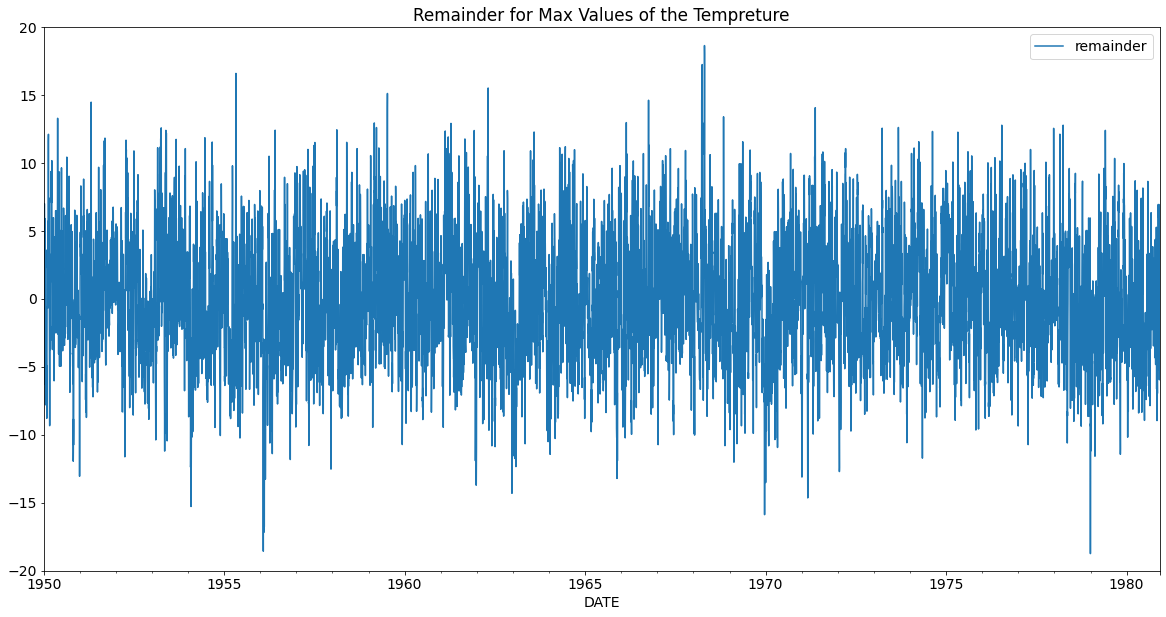

In [351]:
df_max.plot()
plt.ylim(-20, 20)
plt.title("Remainder for Max Values of the Tempreture")

In [352]:
print_adf(df_max)

   
            adf: -32.65
            p: 0.0 
            used lag: 3 
            number of observations: 11289
            -3.43 (p=0.01; CI=99%) 
            -2.86 (p=0.05; CI=95%)
            -2.57 (p=0.1 CI=90%) 
            information criterion (AIC): 55417.552193055526
            


* adf is out of the confidential level 99% and p is 0. So, the remainder for max value is stationary.

# Statsmodels AutoReg

In [353]:
ar_model_mean = AutoReg(endog=df_mean['remainder'], lags=1).fit()
ar_model_mean.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                24837
Model:                     AutoReg(1)   Log Likelihood              -56127.829
Method:               Conditional MLE   S.D. of innovations              2.319
Date:                Fri, 26 Aug 2022   AIC                         112261.659
Time:                        16:26:52   BIC                         112286.019
Sample:                    01-02-1950   HQIC                        112269.546
                         - 12-31-2017                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.015      0.024      0.981      -0.028       0.029
remainder.L1     0.8059      0.004    214.479      0.000       0.799       0.813
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2409           +0.0000j            1.2409            0.0000
-----------------------------------------------------------------------------
"""

In [354]:
ar_model_mean = AutoReg(endog=df_mean['remainder'], lags=3).fit()
ar_model_mean.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                24837
Model:                     AutoReg(3)   Log Likelihood              -55824.499
Method:               Conditional MLE   S.D. of innovations              2.291
Date:                Fri, 26 Aug 2022   AIC                         111658.999
Time:                        16:26:54   BIC                         111699.599
Sample:                    01-04-1950   HQIC                        111672.144
                         - 12-31-2017                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0001      0.015      0.007      0.994      -0.028       0.029
remainder.L1     0.9258      0.006    146.244      0.000       0.913       0.938
remainder.L2    -0.2023      0.009    -23.681      0.000      -0.219      -0.186
remainder.L3     0.0717      0.006     11.329      0.000       0.059       0.084
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2747           -0.0000j            1.2747           -0.0000
AR.2            0.7728           -3.2160j            3.3075           -0.2125
AR.3            0.7728           +3.2160j            3.3075            0.2125
-----------------------------------------------------------------------------
"""

* If we look at the likelihood of both results, with 3 lags we have higher likelihood. Also, the AIC and BIC are decreased, so 3 lags is a better option.

In [355]:
ar_model_min = AutoReg(endog=df_min['remainder'], lags=5).fit()
ar_model_min.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                24837
Model:                     AutoReg(5)   Log Likelihood              -57648.477
Method:               Conditional MLE   S.D. of innovations              2.466
Date:                Fri, 26 Aug 2022   AIC                         115310.953
Time:                        16:28:00   BIC                         115367.792
Sample:                    01-06-1950   HQIC                        115329.356
                         - 12-31-2017                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.016      0.013      0.989      -0.030       0.031
remainder.L1     0.7924      0.006    124.867      0.000       0.780       0.805
remainder.L2    -0.0755      0.008     -9.322      0.000      -0.091      -0.060
remainder.L3     0.0236      0.008      2.912      0.004       0.008       0.040
remainder.L4     0.0110      0.008      1.362      0.173      -0.005       0.027
remainder.L5     0.0207      0.006      3.260      0.001       0.008       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2417           -0.0000j            1.2417           -0.0000
AR.2            1.1671           -1.8447j            2.1829           -0.1602
AR.3            1.1671           +1.8447j            2.1829            0.1602
AR.4           -2.0545           -1.9876j            2.8586           -0.3776
AR.5           -2.0545           +1.9876j            2.8586            0.3776
-----------------------------------------------------------------------------
"""

In [356]:
ar_model_max = AutoReg(endog=df_max['remainder'], lags=3).fit()
ar_model_max.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                11293
Model:                     AutoReg(3)   Log Likelihood              -27804.232
Method:               Conditional MLE   S.D. of innovations              2.840
Date:                Fri, 26 Aug 2022   AIC                          55618.464
Time:                        16:28:01   BIC                          55655.122
Sample:                    01-04-1950   HQIC                         55630.798
                         - 12-01-1980                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0003      0.027     -0.012      0.991      -0.053       0.052
remainder.L1     0.8260      0.009     87.871      0.000       0.808       0.844
remainder.L2    -0.1125      0.012     -9.254      0.000      -0.136      -0.089
remainder.L3     0.0472      0.009      5.023      0.000       0.029       0.066
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3161           -0.0000j            1.3161           -0.0000
AR.2            0.5328           -3.9759j            4.0115           -0.2288
AR.3            0.5328           +3.9759j            4.0115            0.2288
-----------------------------------------------------------------------------
"""